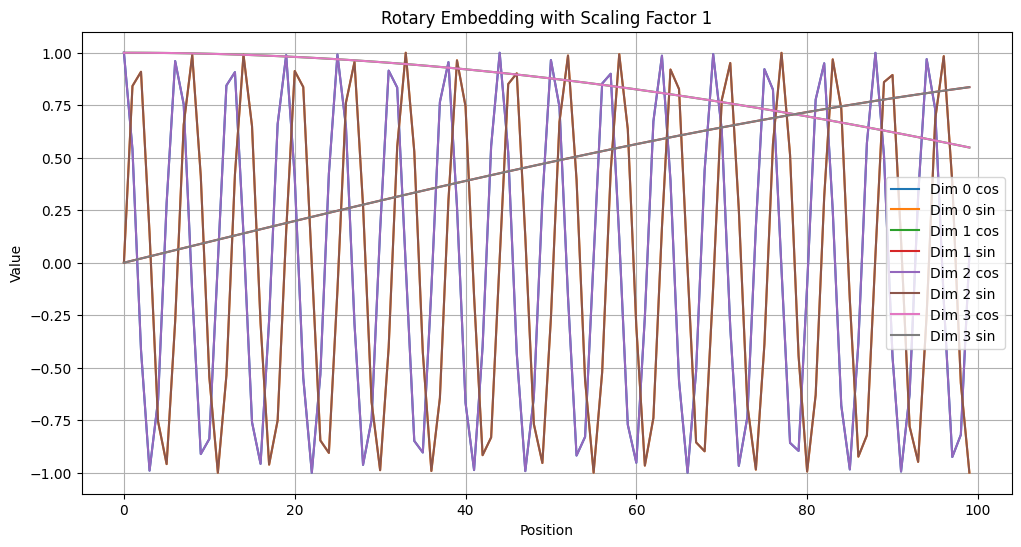

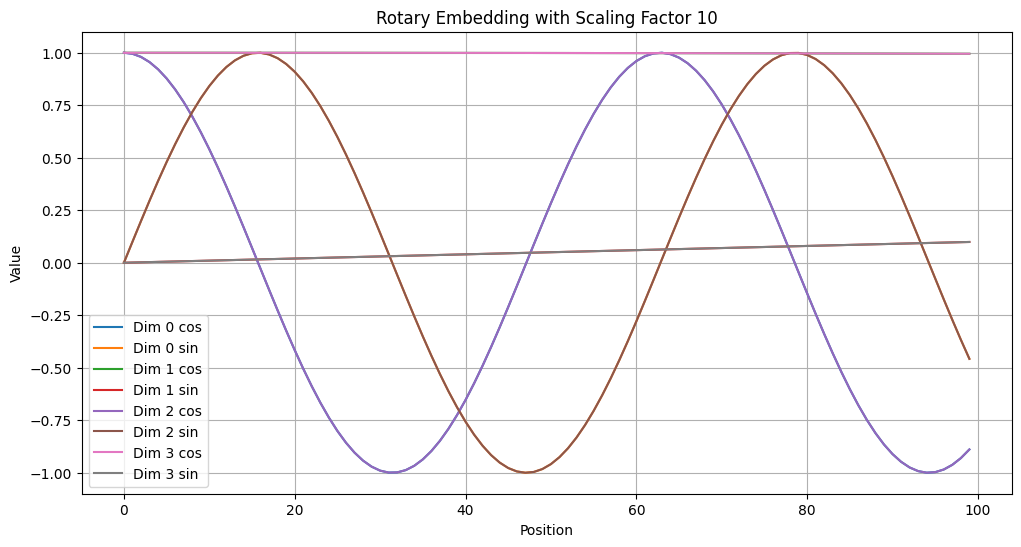

In [55]:
# 当ROPE是linear时
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_rotary_embedding(scaling_factor, max_seq_len=100, dim=4, base=10000):
    device = 'cpu'
    inv_freq = 1.0 / (base ** (torch.arange(0, dim, 2).float() / dim))
    t = torch.arange(max_seq_len, device=device).float()
    t_scaled = t / scaling_factor
    
    freqs = torch.einsum('i,j->ij', t_scaled, inv_freq)
    emb = torch.cat((freqs, freqs), dim=-1)
    
    cos_cached = emb.cos()
    sin_cached = emb.sin()
    
    plt.figure(figsize=(12, 6))
    for i in range(dim):
        plt.plot(cos_cached[:, i].cpu().numpy(), label=f'Dim {i} cos')
        plt.plot(sin_cached[:, i].cpu().numpy(), label=f'Dim {i} sin')
    plt.title(f'Rotary Embedding with Scaling Factor {scaling_factor}')
    plt.xlabel('Position')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_rotary_embedding(scaling_factor=1)
plot_rotary_embedding(scaling_factor=10)


In [56]:
# # 当ROPE是ntk时
# import torch
# import numpy as np
# import matplotlib.pyplot as plt
 
# t = torch.arange(self.max_seq_len_cached, device=device, dtype=self.inv_freq.dtype)

# freqs = torch.einsum("i,j->ij", t, self.inv_freq)
# # Different from paper, but it uses a different permutation in order to obtain the same calculation
# emb = torch.cat((freqs, freqs), dim=-1)
# self.register_buffer("cos_cached", emb.cos().to(dtype), persistent=False)
# self.register_buffer("sin_cached", emb.sin().to(dtype), persistent=False)

# def plot_rotary_embedding(scaling_factor, max_seq_len=100, dim=4, base=10000):
#     device = 'cpu'
#     if seq_len > max_position_embeddings:
#         base = base * (
#             (self.scaling_factor * seq_len / self.max_position_embeddings) - (self.scaling_factor - 1)
#         ) ** (self.dim / (self.dim - 2))
#         inv_freq = 1.0 / (base ** (torch.arange(0, self.dim, 2).float().to(device) / self.dim))
#         self.register_buffer("inv_freq", inv_freq, persistent=False)

#     inv_freq = 1.0 / (base ** (torch.arange(0, dim, 2).float() / dim))
#     t = torch.arange(max_seq_len, device=device).float()
#     # t_scaled = t / scaling_factor
    
#     freqs = torch.einsum('i,j->ij', t_scaled, inv_freq)
#     emb = torch.cat((freqs, freqs), dim=-1)
    
#     cos_cached = emb.cos()
#     sin_cached = emb.sin()
    
#     plt.figure(figsize=(12, 6))
#     for i in range(dim):
#         plt.plot(cos_cached[:, i].cpu().numpy(), label=f'Dim {i} cos')
#         plt.plot(sin_cached[:, i].cpu().numpy(), label=f'Dim {i} sin')
#     plt.title(f'Rotary Embedding with Scaling Factor {scaling_factor}')
#     plt.xlabel('Position')
#     plt.ylabel('Value')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# plot_rotary_embedding(scaling_factor=1)
# plot_rotary_embedding(scaling_factor=10)


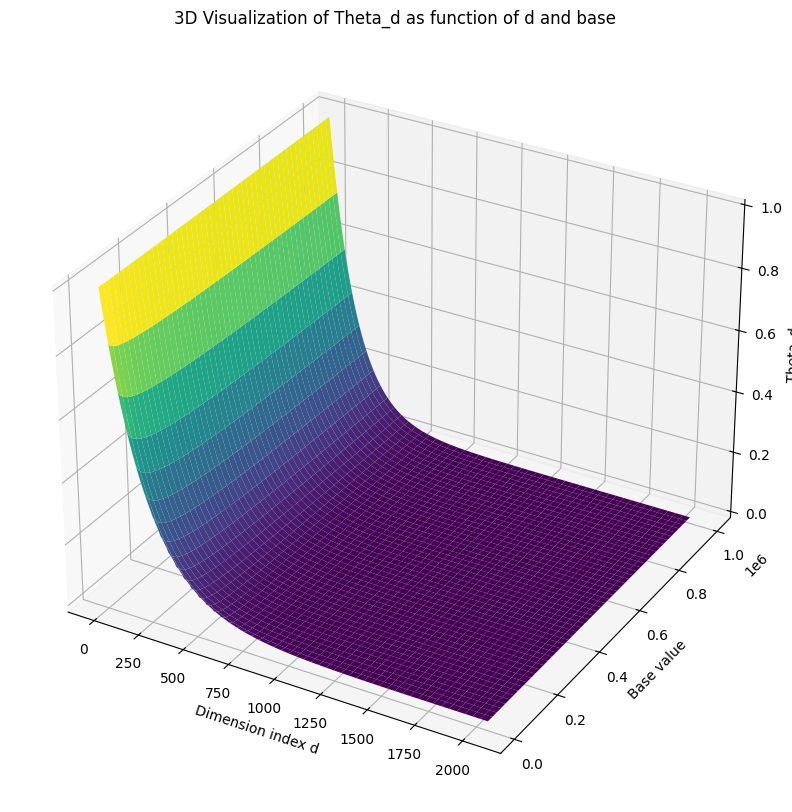

In [57]:
# d 2K
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
D = 4096
base_values = np.linspace(10000, 1000000, 1000)  # 从10000到20000的100个base值
d = np.arange(1,2048+1)  # 从1到D/2
# d = np.arange(2048, 128000) 
# 创建一个三维网格，d和base_values
D_mesh, Base_mesh = np.meshgrid(d, base_values)

# 计算对应的theta值
Theta_mesh = Base_mesh ** (-2 * D_mesh / D)

# 绘制三维图
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')

ax.set_xlabel('Dimension index d')
ax.set_ylabel('Base value')
ax.set_zlabel('Theta_d')
ax.set_title('3D Visualization of Theta_d as function of d and base')

plt.show()


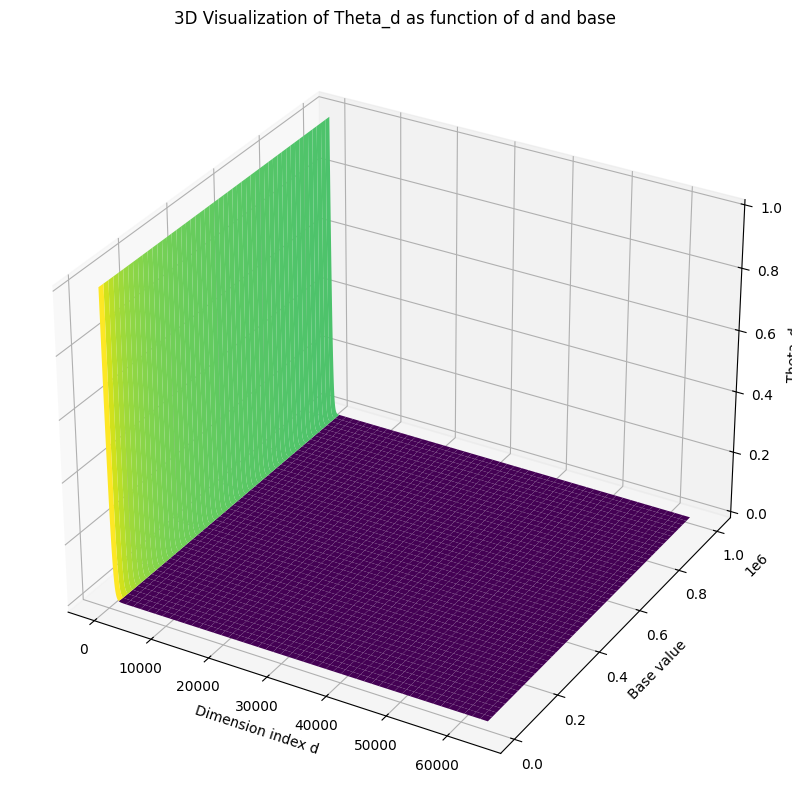

In [58]:
# d 128K
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
D = 4096
base_values = np.linspace(10000, 1000000, 1000)  # 从10000到20000的100个base值
# d = np.arange(1, 80192//2 + 1)  # 从1到D/2
d = np.arange(1, 128000//2 + 1) 
# 创建一个三维网格，d和base_values
D_mesh, Base_mesh = np.meshgrid(d, base_values)

# 计算对应的theta值
Theta_mesh = Base_mesh ** (-2 * D_mesh / D)

# 绘制三维图
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')

ax.set_xlabel('Dimension index d')
ax.set_ylabel('Base value')
ax.set_zlabel('Theta_d')
ax.set_title('3D Visualization of Theta_d as function of d and base')

plt.show()


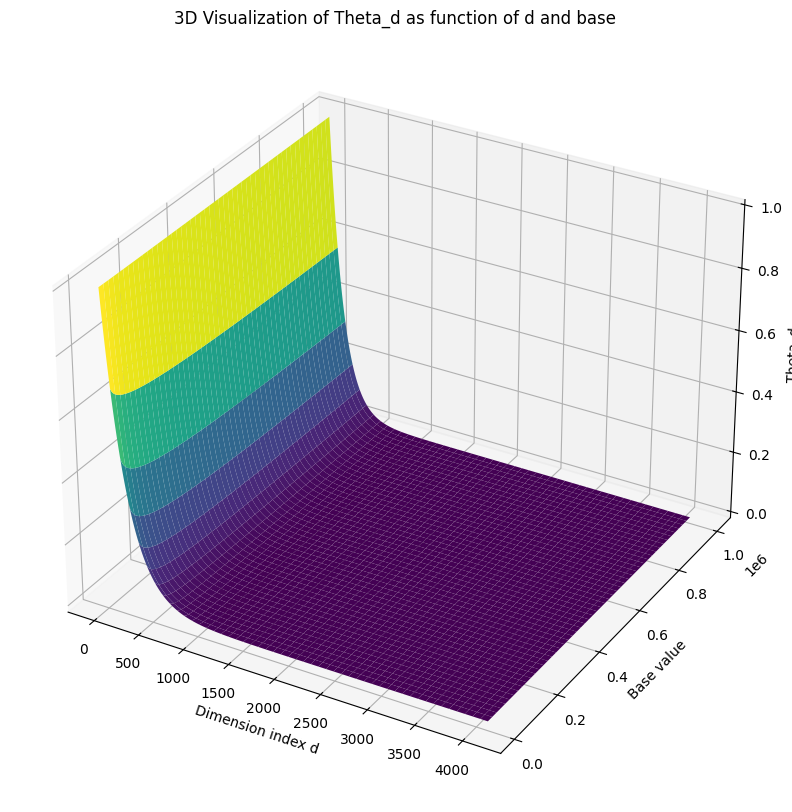

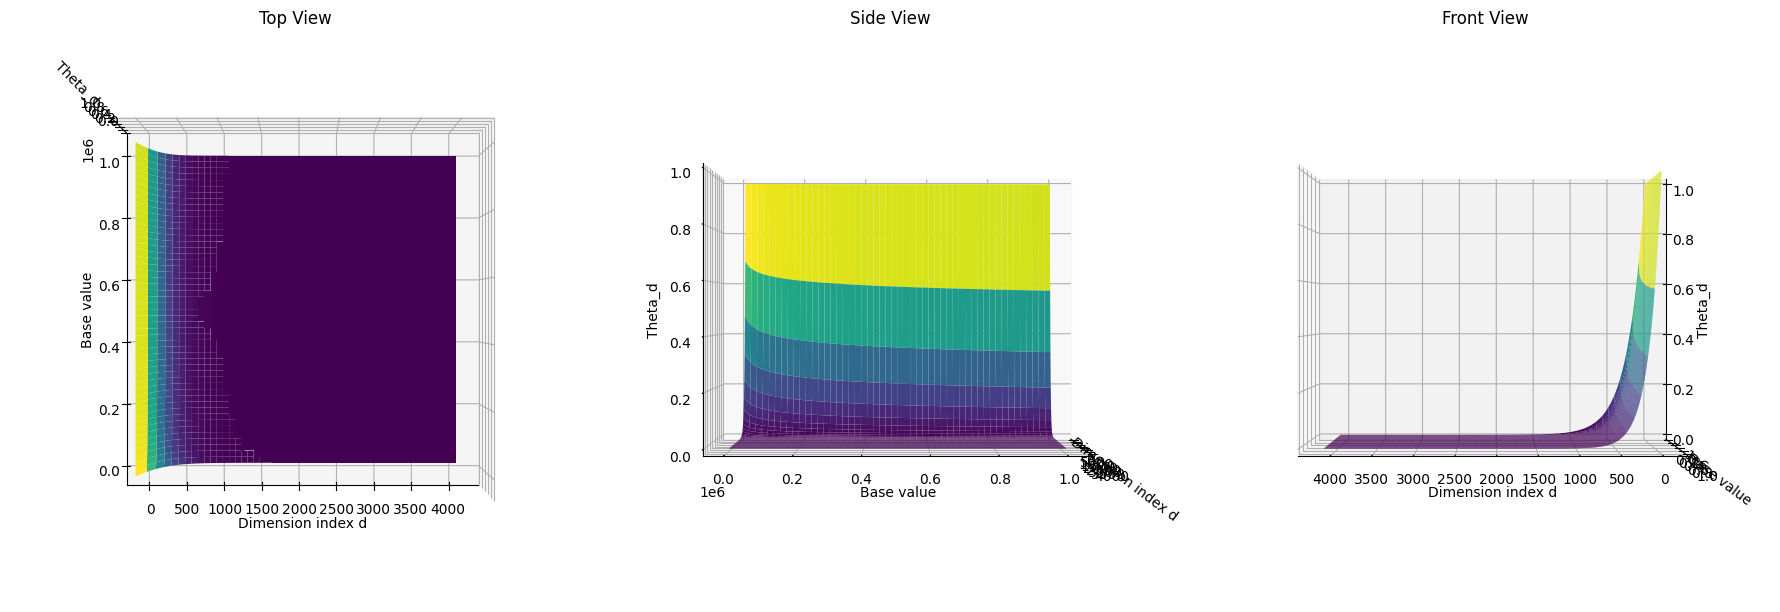

In [59]:
# Hidden Size 2048 对\theta_d的影响
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
D = 4096
base_values = np.linspace(10000, 1000000, 1000)  # 从10000到20000的100个base值
# d = np.arange(1, 80192//2 + 1)  # 从1到D/2
d = np.arange(1, 4096+1) 
# 创建一个三维网格，d和base_values
D_mesh, Base_mesh = np.meshgrid(d, base_values)

# 计算对应的theta值
Theta_mesh = Base_mesh ** (-2 * D_mesh / D)

# 绘制三维图
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')

ax.set_xlabel('Dimension index d')
ax.set_ylabel('Base value')
ax.set_zlabel('Theta_d')
ax.set_title('3D Visualization of Theta_d as function of d and base')

plt.show()

# 使用提供的参数绘制三维图及其三视图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 设置参数
D = 4096
base_values = np.linspace(10000, 1000000, 1000)  # 从10000到1000000的1000个base值
d = np.arange(1, 4096 + 1)  # 从1到4096

# 创建一个三维网格，d和base_values
D_mesh, Base_mesh = np.meshgrid(d, base_values)

# 计算对应的theta值
Theta_mesh = Base_mesh ** (-2 * D_mesh / D)

# 创建图像
fig = plt.figure(figsize=(18, 6))

# 顶视图 (Top View)
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')
ax1.view_init(elev=90, azim=-90)  # 只改变视角
ax1.set_title('Top View')
ax1.set_xlabel('Dimension index d')
ax1.set_ylabel('Base value')
ax1.set_zlabel('Theta_d')

# 侧视图 (Side View)
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')
ax2.view_init(elev=0, azim=0)  # 只改变视角
ax2.set_title('Side View')
ax2.set_xlabel('Dimension index d')
ax2.set_ylabel('Base value')
ax2.set_zlabel('Theta_d')

# 前视图 (Front View)
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')
ax3.view_init(elev=0, azim=90)  # 只改变视角
ax3.set_title('Front View')
ax3.set_xlabel('Dimension index d')
ax3.set_ylabel('Base value')
ax3.set_zlabel('Theta_d')

plt.tight_layout()
plt.show()


In [60]:
# # Hidden Size 4096 对\theta_d的影响
# from mpl_toolkits.mplot3d import Axes3D

# # 使用提供的参数绘制三维图及其三视图
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # 设置参数
# D = 4096
# base_values = np.linspace(10000, 1000000, 1000)  # 从10000到1000000的1000个base值
# d = np.arange(1, 4096 + 1)  # 从1到4096
# for i in d:
#     if i > Max_emb:
#         i *= Max_emb / (i- Max_emb) 
# # 创建一个三维网格，d和base_values
# D_mesh, Base_mesh = np.meshgrid(d, base_values)

# # 计算对应的theta值
# Theta_mesh = Base_mesh ** (-2 * D_mesh / D)

# # 绘制三维图
# fig = plt.figure(figsize=(14, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')

# ax.set_xlabel('Dimension index d')
# ax.set_ylabel('Base value')
# ax.set_zlabel('Theta_d')
# ax.set_title('3D Visualization of Theta_d as function of d and base')

# plt.show()

# # 创建图像
# fig = plt.figure(figsize=(18, 6))

# # 顶视图 (Top View)
# ax1 = fig.add_subplot(131, projection='3d')
# surf = ax1.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')
# ax1.view_init(elev=90, azim=-90)  # 只改变视角
# ax1.set_title('Top View')
# ax1.set_xlabel('Dimension index d')
# ax1.set_ylabel('Base value')
# ax1.set_zlabel('Theta_d')

# # 侧视图 (Side View)
# ax2 = fig.add_subplot(132, projection='3d')
# surf2 = ax2.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')
# ax2.view_init(elev=0, azim=0)  # 只改变视角
# ax2.set_title('Side View')
# ax2.set_xlabel('Dimension index d')
# ax2.set_ylabel('Base value')
# ax2.set_zlabel('Theta_d')

# # 前视图 (Front View)
# ax3 = fig.add_subplot(133, projection='3d')
# surf3 = ax3.plot_surface(D_mesh, Base_mesh, Theta_mesh, cmap='viridis')
# ax3.view_init(elev=0, azim=90)  # 只改变视角
# ax3.set_title('Front View')
# ax3.set_xlabel('Dimension index d')
# ax3.set_ylabel('Base value')
# ax3.set_zlabel('Theta_d')

# plt.tight_layout()
# plt.show()


In [ ]:

import numpy as np 
import matplotlib.pyplot as plt
# 4k
# 设置参数
base = 10000  # 将base设为大于10000的值
D = 4096
d = np.arange(1, 2048//2 + 1)  # 从1到D/2
m = np.arange(1, 2048//2 + 1)

# 不同的base值
bases = [10000, 500000, 1000000]

# 为每个base值计算theta_d
plt.figure(figsize=(10, 5))

for base in bases:
    theta_d = base ** (-2 * d / D)
    m_theta_d = m * theta_d 
    plt.plot(d, m_theta_d, label=f'base = {base}')

plt.xlabel('Dimension index d')
plt.ylabel('Theta_d')
plt.title('Visualization of m * Theta_d for different base values')
plt.grid(True)
plt.yscale('log')
plt.legend()
plt.show()


AttributeError: module 'matplotlib_inline' has no attribute 'figure'

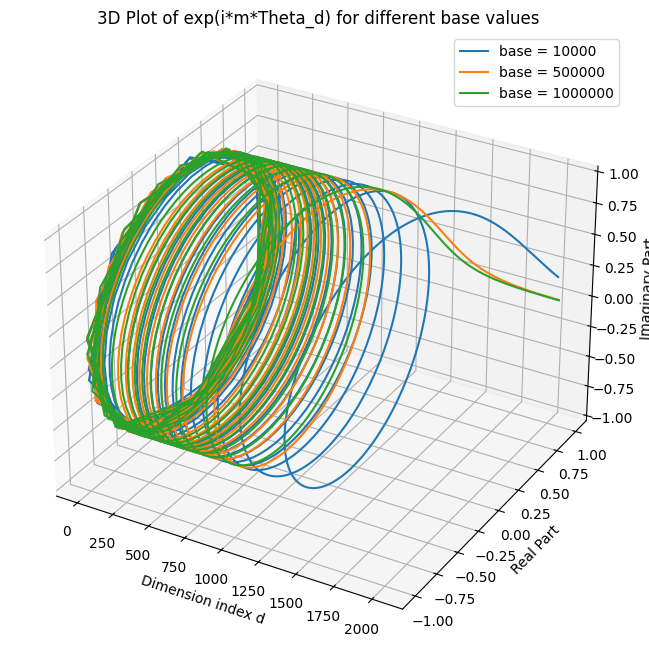

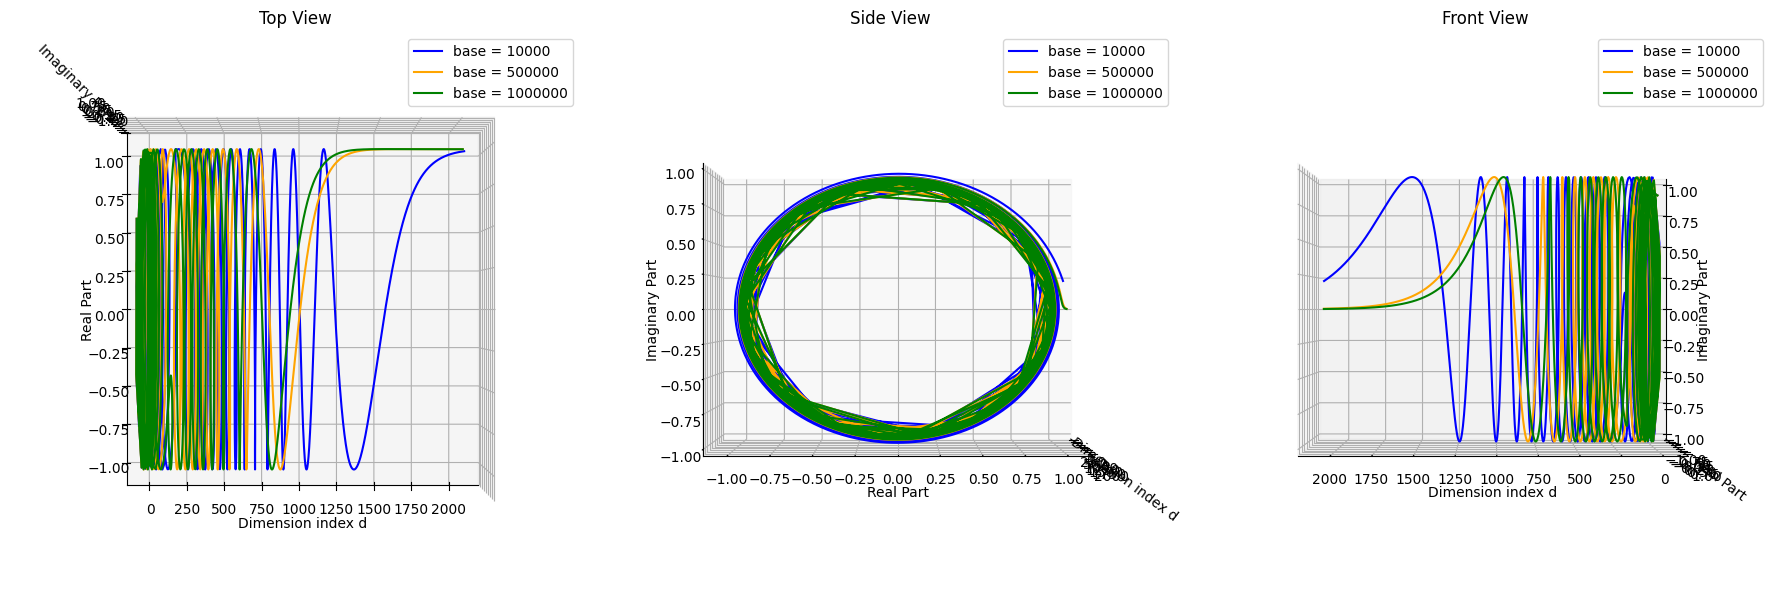

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#4K
# 设置参数
D = 4096
d = np.arange(1, 81920//2 + 1)  # 从1到D/2
m = np.arange(1, 81920//2 + 1)  # 同样长度的 m

# 不同的base值
bases = [10000, 500000, 1000000]

# 创建三维图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 为每个base值计算theta_d并绘制exp(i*m*theta_d)
for base in bases:
    theta_d = base ** (-2 * d / D)
    m_theta_d = m * theta_d
    exp_i_x = np.exp(1j * m_theta_d)  # 计算复数指数
    ax.plot(d[:2048], np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], label=f'base = {base}')  # 绘制实部和虚部

ax.set_xlabel('Dimension index d')
ax.set_ylabel('Real Part')
ax.set_zlabel('Imaginary Part')
ax.set_title('3D Plot of exp(i*m*Theta_d) for different base values')
ax.legend()

plt.show()

# 创建图像
fig = plt.figure(figsize=(18, 6))

# 创建三个独立的坐标轴对象
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

# 绘制三视图
colors = ['b', 'orange', 'g']  # 不同颜色的曲线
for i, base in enumerate(bases):
    theta_d = base ** (-2 * d / D)
    m_theta_d = m * theta_d
    exp_i_x = np.exp(1j * m_theta_d)  # 计算复数指数

    # 顶视图 (Top View)
    ax1.plot(d[:2048], np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], label=f'base = {base}', color=colors[i])
    ax1.view_init(elev=90, azim=-90)
    ax1.set_title('Top View')
    ax1.set_xlabel('Dimension index d')
    ax1.set_ylabel('Real Part')
    ax1.set_zlabel('Imaginary Part')

    # 侧视图 (Side View)
    ax2.plot(d[:2048], np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], label=f'base = {base}', color=colors[i])
    ax2.view_init(elev=0, azim=0)
    ax2.set_title('Side View')
    ax2.set_xlabel('Dimension index d')
    ax2.set_ylabel('Real Part')
    ax2.set_zlabel('Imaginary Part')

    # 前视图 (Front View)
    ax3.plot(d[:2048], np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], label=f'base = {base}', color=colors[i])

    ax3.view_init(elev=0, azim=90)
    ax3.set_title('Front View')
    ax3.set_xlabel('Dimension index d')
    ax3.set_ylabel('Real Part')
    ax3.set_zlabel('Imaginary Part')

# 添加图例
ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()
plt.show()



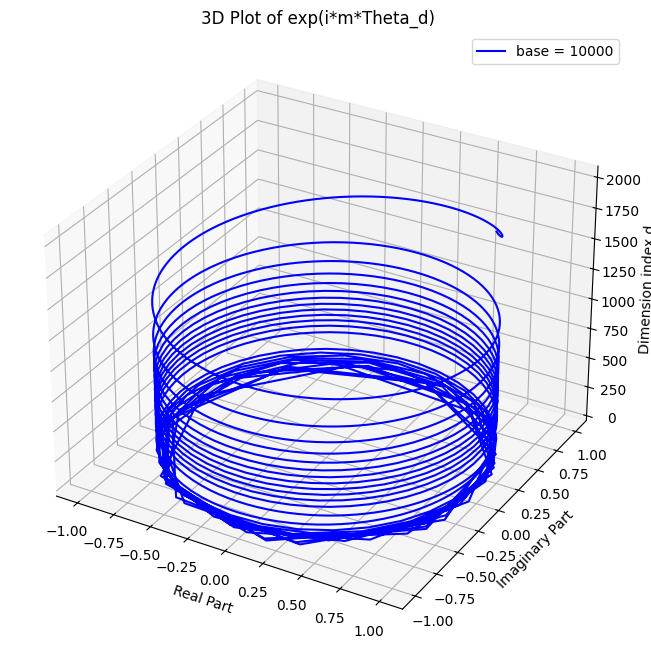

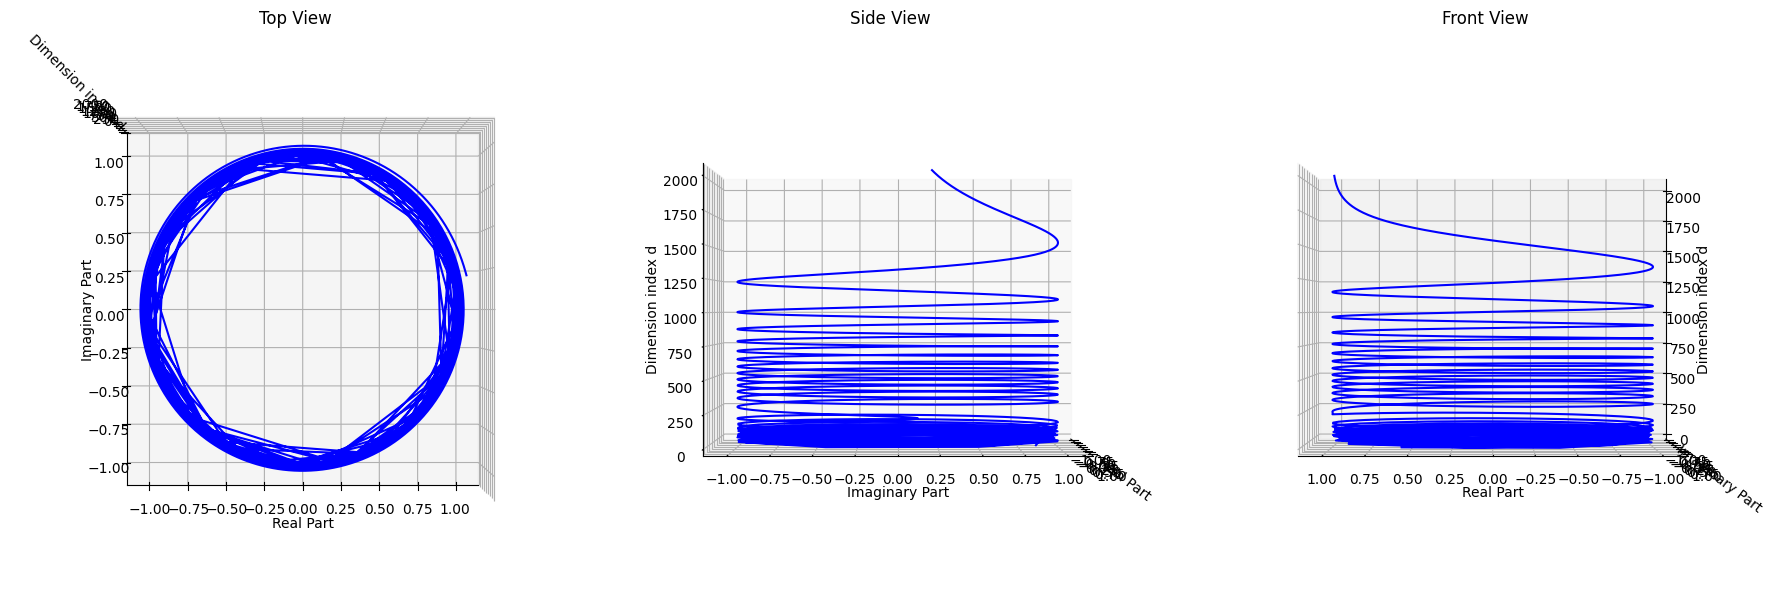

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
D = 4096
d = np.arange(1, 81920//2 + 1)  # 从1到D/2
m = np.arange(1, 81920//2 + 1)  # 同样长度的 m
base = 10000  # Base value

# 计算theta_d并绘制exp(i*m*theta_d)
theta_d = base ** (-2 * d / D)
m_theta_d = m * theta_d
exp_i_x = np.exp(1j * m_theta_d)  # 计算复数指数
# 创建三维图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 将实部和虚部作为XY坐标，将d作为Z坐标
ax.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048], color='blue', label=f'base = {base}')

ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Dimension index d')
ax.set_title('3D Plot of exp(i*m*Theta_d)')

plt.legend()
plt.show()
# 创建图像
fig = plt.figure(figsize=(18, 6))

# 顶视图 (Top View)
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048], color='blue')
ax1.view_init(elev=90, azim=-90)
ax1.set_title('Top View')
ax1.set_xlabel('Real Part')
ax1.set_ylabel('Imaginary Part')
ax1.set_zlabel('Dimension index d')

# 侧视图 (Side View)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048],color='blue')
ax2.view_init(elev=0, azim=0)
ax2.set_title('Side View')
ax2.set_xlabel('Real Part')
ax2.set_ylabel('Imaginary Part')
ax2.set_zlabel('Dimension index d')

# 前视图 (Front View)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048], color='blue')
ax3.view_init(elev=0, azim=90)
ax3.set_title('Front View')
ax3.set_xlabel('Real Part')
ax3.set_ylabel('Imaginary Part')
ax3.set_zlabel('Dimension index d')

plt.tight_layout()
plt.show()


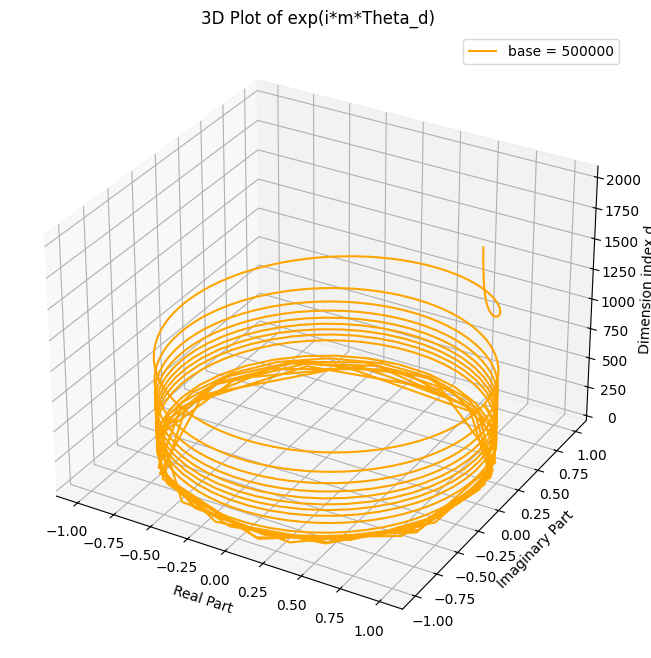

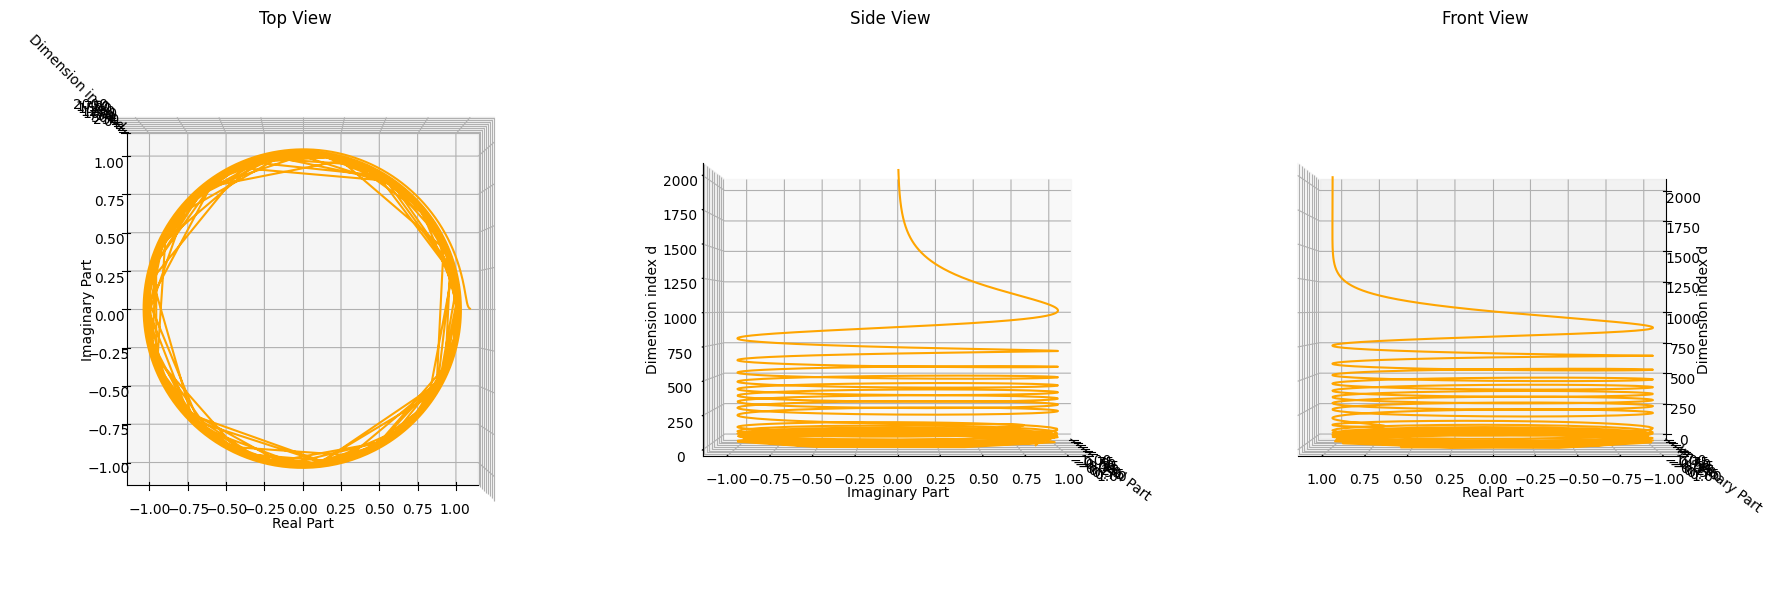

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
D = 4096
d = np.arange(1, 81920//2 + 1)  # 从1到D/2
m = np.arange(1, 81920//2 + 1)  # 同样长度的 m
base = 500000  # Base value

# 计算theta_d并绘制exp(i*m*theta_d)
theta_d = base ** (-2 * d / D)
m_theta_d = m * theta_d
exp_i_x = np.exp(1j * m_theta_d)  # 计算复数指数
# 创建三维图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 将实部和虚部作为XY坐标，将d作为Z坐标
ax.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048], color='orange', label=f'base = {base}')

ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Dimension index d')
ax.set_title('3D Plot of exp(i*m*Theta_d)')

plt.legend()
plt.show()
# 创建图像
fig = plt.figure(figsize=(18, 6))

# 顶视图 (Top View)
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048], color='orange')
ax1.view_init(elev=90, azim=-90)
ax1.set_title('Top View')
ax1.set_xlabel('Real Part')
ax1.set_ylabel('Imaginary Part')
ax1.set_zlabel('Dimension index d')

# 侧视图 (Side View)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048], color='orange')
ax2.view_init(elev=0, azim=0)
ax2.set_title('Side View')
ax2.set_xlabel('Real Part')
ax2.set_ylabel('Imaginary Part')
ax2.set_zlabel('Dimension index d')

# 前视图 (Front View)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048], color='orange')
ax3.view_init(elev=0, azim=90)
ax3.set_title('Front View')
ax3.set_xlabel('Real Part')
ax3.set_ylabel('Imaginary Part')
ax3.set_zlabel('Dimension index d')

plt.tight_layout()
plt.show()


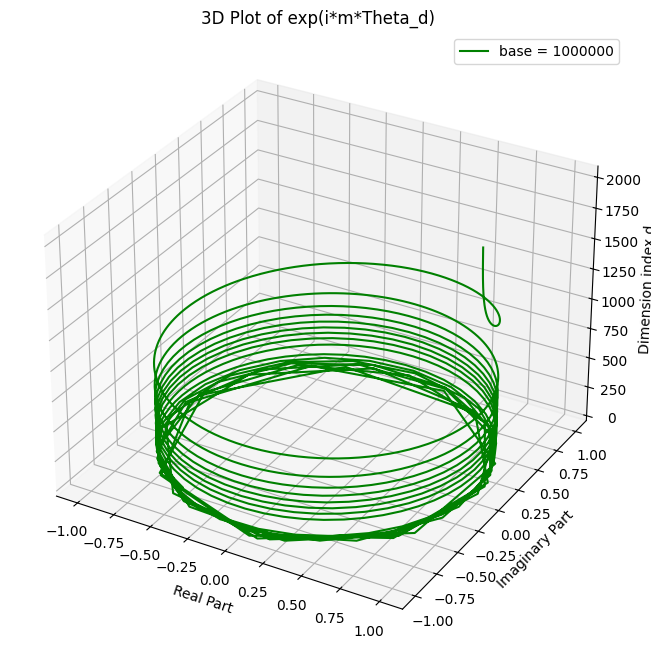

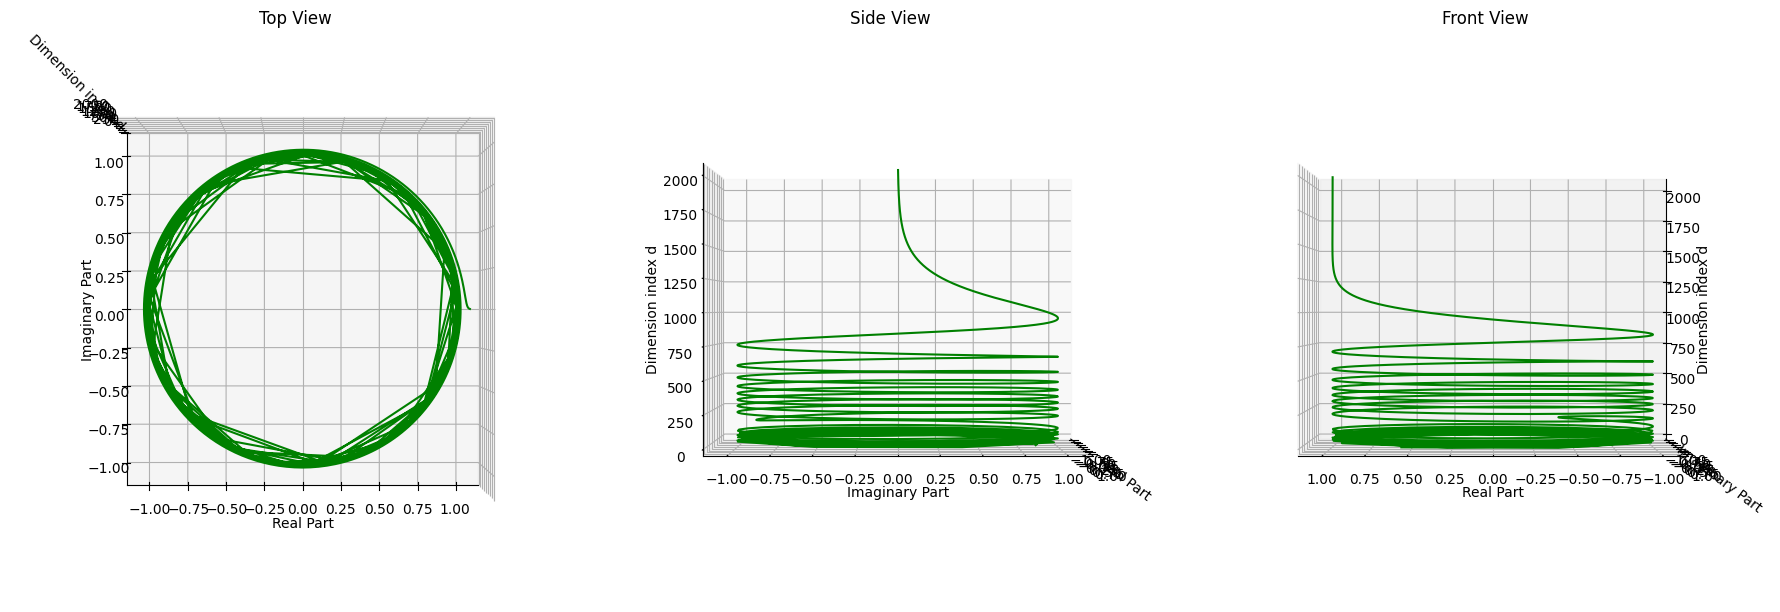

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
D = 4096
d = np.arange(1, 81920//2 + 1)  # 从1到D/2
m = np.arange(1, 81920//2 + 1)  # 同样长度的 m
base = 1000000  # Base value

# 计算theta_d并绘制exp(i*m*theta_d)
theta_d = base ** (-2 * d / D)
m_theta_d = m * theta_d
exp_i_x = np.exp(1j * m_theta_d)  # 计算复数指数
# 创建三维图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 将实部和虚部作为XY坐标，将d作为Z坐标
ax.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048], color='green', label=f'base = {base}')

ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Dimension index d')
ax.set_title('3D Plot of exp(i*m*Theta_d)')

plt.legend()
plt.show()
# 创建图像
fig = plt.figure(figsize=(18, 6))

# 顶视图 (Top View)
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048],  color='green',)
ax1.view_init(elev=90, azim=-90)
ax1.set_title('Top View')
ax1.set_xlabel('Real Part')
ax1.set_ylabel('Imaginary Part')
ax1.set_zlabel('Dimension index d')

# 侧视图 (Side View)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048],  color='green',)
ax2.view_init(elev=0, azim=0)
ax2.set_title('Side View')
ax2.set_xlabel('Real Part')
ax2.set_ylabel('Imaginary Part')
ax2.set_zlabel('Dimension index d')

# 前视图 (Front View)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048],  color='green',)
ax3.view_init(elev=0, azim=90)
ax3.set_title('Front View')
ax3.set_xlabel('Real Part')
ax3.set_ylabel('Imaginary Part')
ax3.set_zlabel('Dimension index d')

plt.tight_layout()
plt.show()


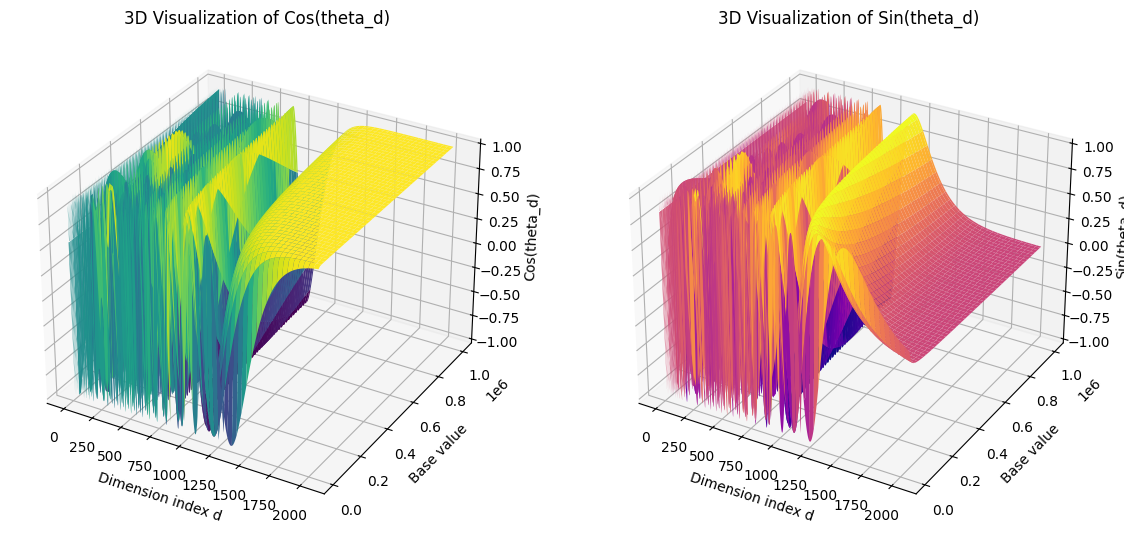

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
D = 4096
base_values = np.linspace(10000, 1000000, 100)  # 从10000到1000000的base值
d = np.arange(1, 4096//2 + 1)  # 从1到D/2

# 创建一个三维网格，d和base_values
D_mesh, Base_mesh = np.meshgrid(d, base_values)
m = np.arange(1,4096//2 + 1)
# 计算对应的theta值
Theta_mesh = m* Base_mesh ** (-2 * D_mesh / D)

# 计算cos和sin值
Cos_mesh = np.cos(Theta_mesh[:2048])
Sin_mesh = np.sin(Theta_mesh[:2048])

# 绘制cos(theta_d)
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(D_mesh[:2048], Base_mesh[:2048], Cos_mesh[:2048], cmap='viridis')
ax.set_xlabel('Dimension index d')
ax.set_ylabel('Base value')
ax.set_zlabel('Cos(theta_d)')
ax.set_title('3D Visualization of Cos(theta_d)')

# 绘制sin(theta_d)
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(D_mesh[:2048], Base_mesh[:2048], Sin_mesh[:2048], cmap='plasma')
ax2.set_xlabel('Dimension index d')
ax2.set_ylabel('Base value')
ax2.set_zlabel('Sin(theta_d)')
ax2.set_title('3D Visualization of Sin(theta_d)')

plt.show()


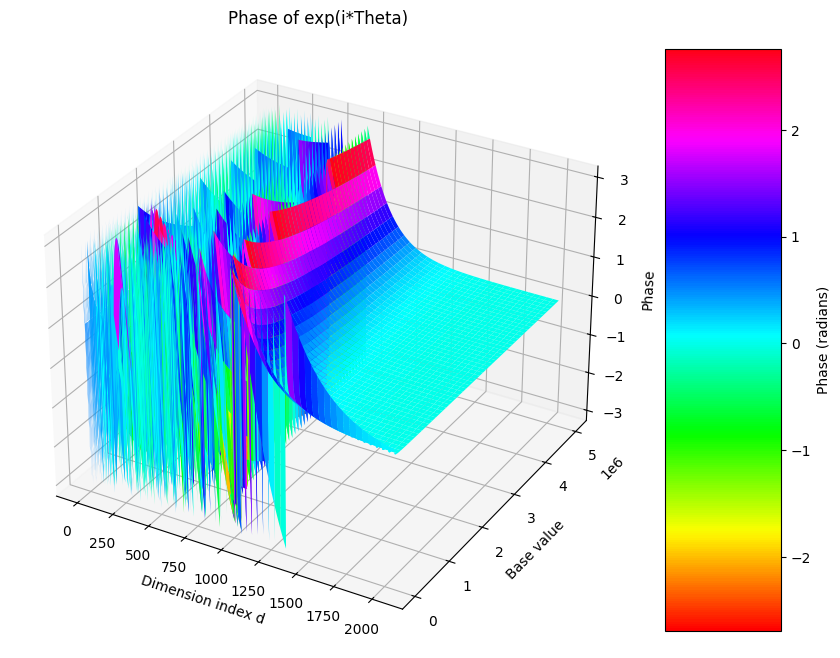

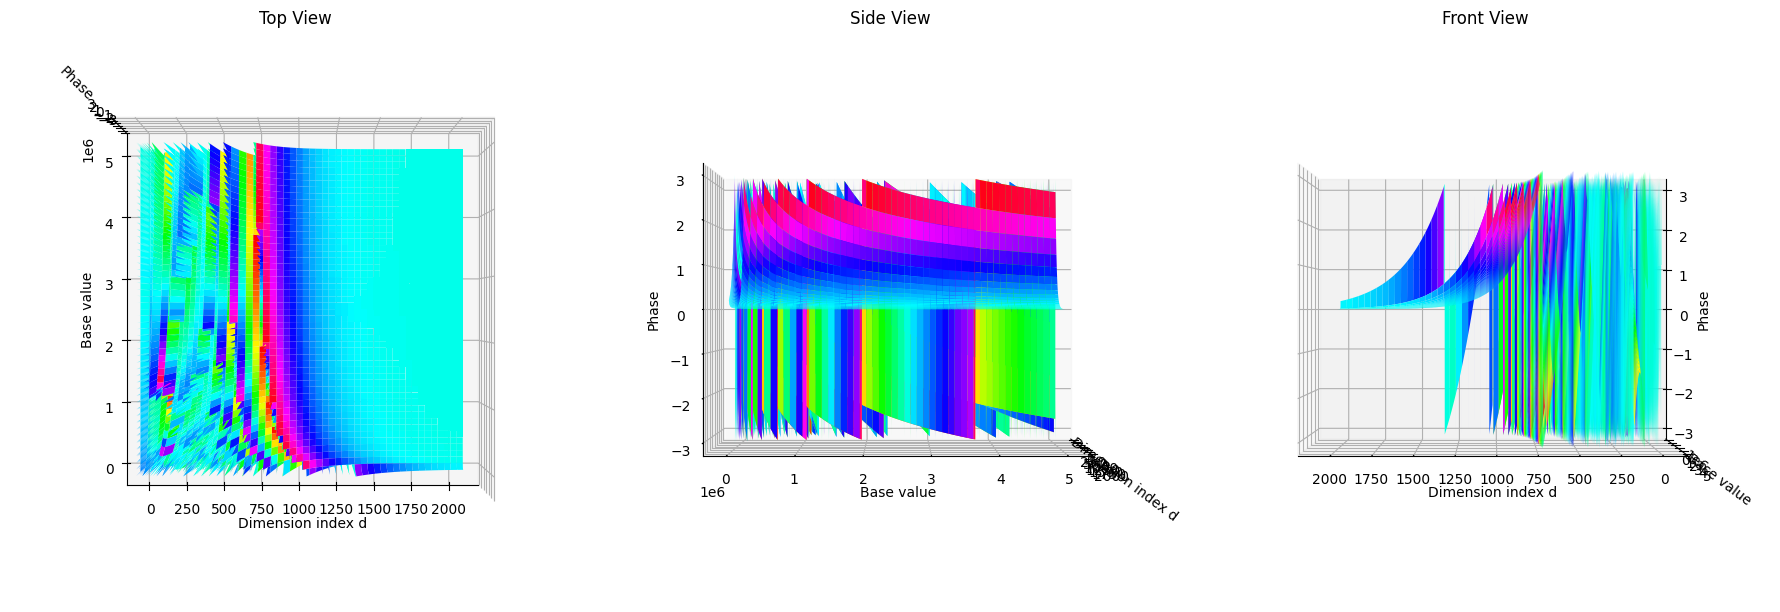

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
D = 4096
base_values = np.linspace(10000, 5000000, 1000)  # 从10000到1000000的base值
d = np.arange(1, 4096//2 + 1)  # 从1到D/2

# 创建一个三维网格，d和base_values
D_mesh, Base_mesh = np.meshgrid(d, base_values)
m = np.arange(1, 4096//2 + 1)

# 计算对应的theta值
Theta_mesh = m * Base_mesh ** (-2 * D_mesh / D)
# 计算 e^{i*theta}
exp_i_theta = np.exp(1j * Theta_mesh)

#  e^{i\theta}的模（幅度）和相位作为另外两个变量展示。
# 由于 e^{i\theta}的模总是 1
# （因为 e^{i\theta}在复平面上表示单位圆上的点），我们只需可视化相位即可，通常这通过颜色映射来表示。

# 提取实部和虚部用于绘图
real_part = np.real(exp_i_theta)
imag_part = np.imag(exp_i_theta)

# 获取相位信息
phase = np.angle(exp_i_theta)

# 绘制三维图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 使用相位作为颜色映射
surf = ax.plot_surface(D_mesh, Base_mesh, phase, cmap='hsv', edgecolor='none')
ax.set_title('Phase of exp(i*Theta)')
ax.set_xlabel('Dimension index d')
ax.set_ylabel('Base value')
ax.set_zlabel('Phase')
cbar = fig.colorbar(surf, ax=ax, aspect=5)
cbar.set_label('Phase (radians)')

plt.show()


# 创建图像
fig = plt.figure(figsize=(18, 6))

# 顶视图 (Top View)
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(D_mesh, Base_mesh, phase, cmap='hsv')
ax1.view_init(elev=90, azim=-90)  # 只改变视角
ax1.set_title('Top View')
ax1.set_xlabel('Dimension index d')
ax1.set_ylabel('Base value')
ax1.set_zlabel('Phase')

# 侧视图 (Side View)
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(D_mesh, Base_mesh, phase, cmap='hsv')
ax2.view_init(elev=0, azim=0)  # 只改变视角
ax2.set_title('Side View')
ax2.set_xlabel('Dimension index d')
ax2.set_ylabel('Base value')
ax2.set_zlabel('Phase')

# 前视图 (Front View)
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(D_mesh, Base_mesh, phase, cmap='hsv')
ax3.view_init(elev=0, azim=90)  # 只改变视角
ax3.set_title('Front View')
ax3.set_xlabel('Dimension index d')
ax3.set_ylabel('Base value')
ax3.set_zlabel('Phase')

plt.tight_layout()
plt.show()

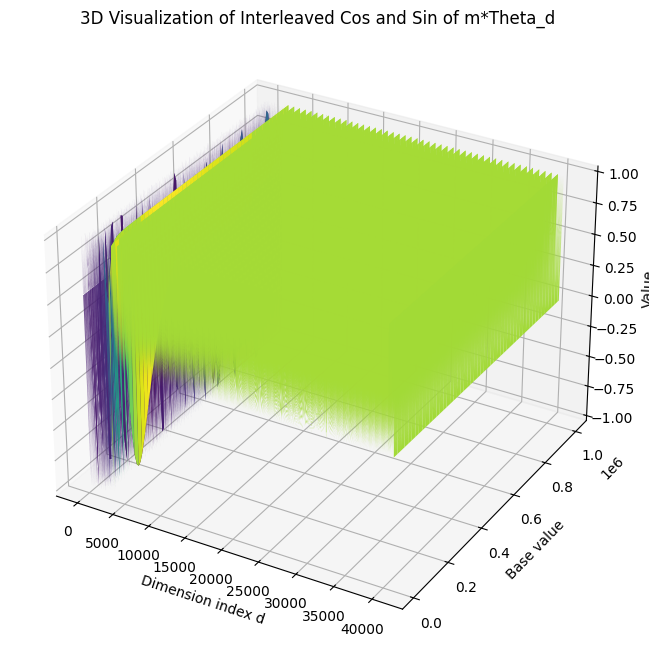

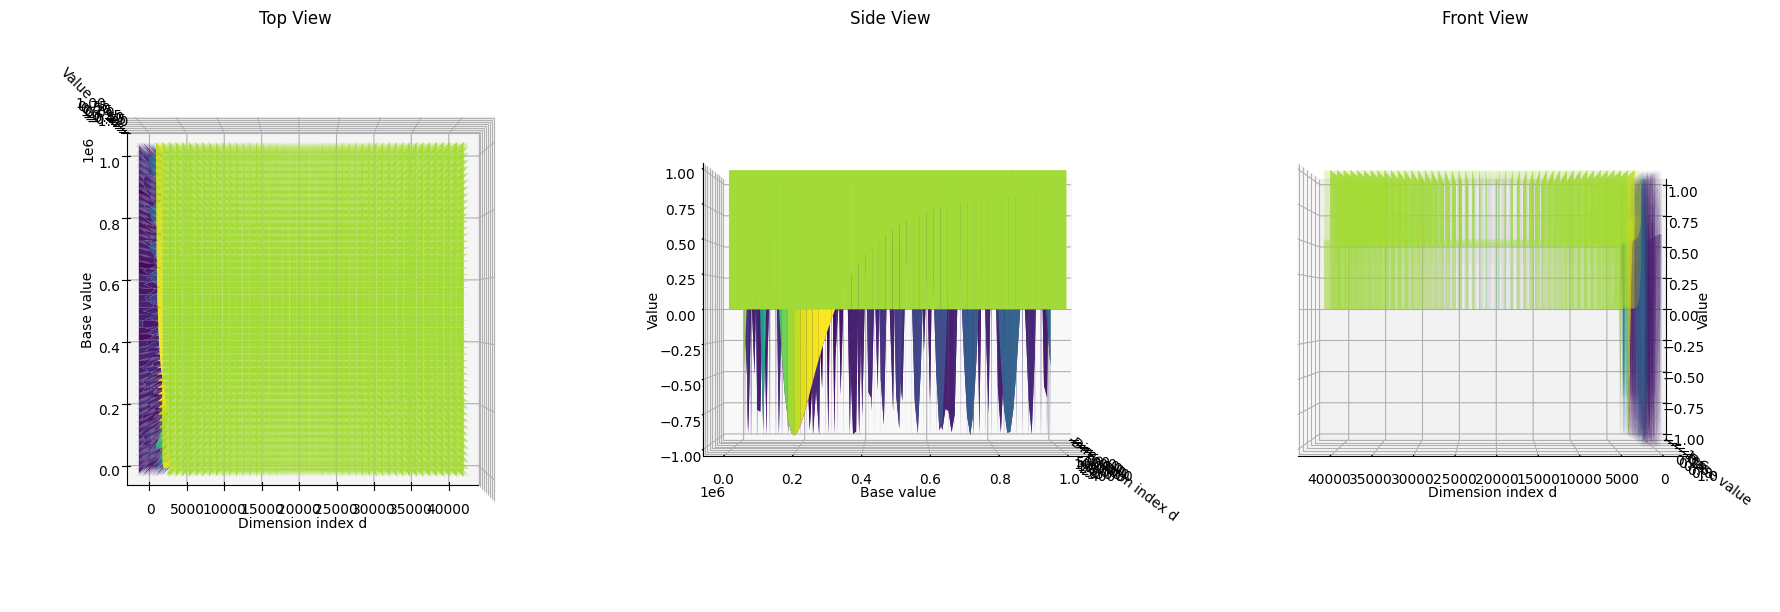

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
D = 4096
base_values = np.linspace(10000, 1000000, 100)  # 从10000到1000000的100个base值
d = np.arange(1, 81920//2 + 1)  # 从1到D/2
m = np.arange(1, 81920//2 + 1)  # 确保m的长度与d匹配

# 创建一个三维网格，d和base_values
D_mesh, Base_mesh = np.meshgrid(d, base_values)

# 计算对应的theta值
Theta_mesh = m*Base_mesh ** (-2 * D_mesh / D)

# 初始化用于存放cos和sin值的数组
Values_mesh = np.zeros_like(Theta_mesh)

# 扩展m以匹配Theta_mesh的形状
m_extended = np.tile(m, (Theta_mesh.shape[0], 1))

# 为奇数索引d计算cos值，为偶数索引d计算sin值
Values_mesh[:, 0::2] = np.cos(m_extended[:, 0::2] * Theta_mesh[:, 0::2])  # 偶数索引列
Values_mesh[:, 1::2] = np.sin(m_extended[:, 1::2] * Theta_mesh[:, 1::2])  # 奇数索引列

# 绘制三维图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(D_mesh, Base_mesh, Values_mesh, cmap='viridis')

ax.set_xlabel('Dimension index d')
ax.set_ylabel('Base value')
ax.set_zlabel('Value')
ax.set_title('3D Visualization of Interleaved Cos and Sin of m*Theta_d')

plt.show()


fig = plt.figure(figsize=(18, 6))

# 顶视图 (Top View)
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(D_mesh, Base_mesh, Values_mesh, cmap='viridis')
ax1.view_init(elev=90, azim=-90)
ax1.set_title('Top View')
ax1.set_xlabel('Dimension index d')
ax1.set_ylabel('Base value')
ax1.set_zlabel('Value')

# 侧视图 (Side View)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(D_mesh, Base_mesh, Values_mesh, cmap='viridis')
ax2.view_init(elev=0, azim=0)
ax2.set_title('Side View')
ax2.set_xlabel('Dimension index d')
ax2.set_ylabel('Base value')
ax2.set_zlabel('Value')

# 前视图 (Front View)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(D_mesh, Base_mesh, Values_mesh, cmap='viridis')
ax3.view_init(elev=0, azim=90)
ax3.set_title('Front View')
ax3.set_xlabel('Dimension index d')
ax3.set_ylabel('Base value')
ax3.set_zlabel('Value')

plt.tight_layout()
plt.show()


# NTK RoPE
Hidden_Size = 4096

Max_emb = 8192
## scale
```
d = np.arange(1, 128000//2 + 1)
for m in d:
    if m > Max_emb:
        s =  (m- Max_emb)  / Max_emb
        m *= ( 1 / s )
```
## NTK
```
d = np.arange(1, 128000//2 + 1)
for m in d:
    if m > Max_emb:
        s =  (m- Max_emb)  / Max_emb
        m *= ( 1 / s )
        base *= s**( Hidden_Size / (Hidden_Size - 2))
        theta = base ** (-2 * m / Hidden_Size)
```


[3.00012207 3.00024414 3.00036621 ... 8.99975586 8.99987793 9.        ]
[1.000e+00 2.000e+00 3.000e+00 ... 8.192e+03 8.192e+03 8.192e+03]
[8192. 8192. 8192. ... 8192. 8192. 8192.]
[1.00450736e+00 1.00000000e+00 1.00000000e+00 ... 1.00903504e-32
 1.00903504e-32 1.00450736e-32]
[1.00450736e-32 1.00000000e-32 1.00000000e-32 ... 1.00903504e-80
 1.00903504e-80 1.00450736e-80]
[0.00000000e+00 1.00000000e+00 1.00000000e+00 ... 4.13300754e-29
 4.13300754e-29 4.11446216e-29]
[4.11446216e-29 4.09600000e-29 4.09600000e-29 ... 4.13300754e-77
 4.13300754e-77 4.11446216e-77]
[1.        +0.00000000e+00j 0.54030231+8.41470985e-01j
 0.54030231+8.41470985e-01j ... 1.        +4.13300754e-29j
 1.        +4.13300754e-29j 1.        +4.11446216e-29j]
[1.+4.11446216e-29j 1.+4.09600000e-29j 1.+4.09600000e-29j ...
 1.+4.13300754e-77j 1.+4.13300754e-77j 1.+4.11446216e-77j]
[1.00642798e+00 1.00000000e+00 1.00000000e+00 ... 2.59301701e-46
 2.59301701e-46 2.57645562e-46]
[2.57645562e-046 2.56000000e-046 2.56000000e

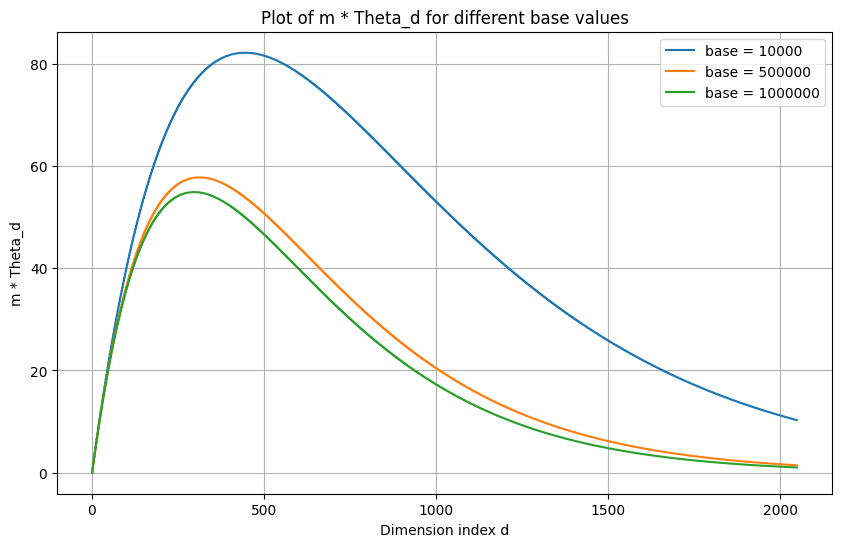

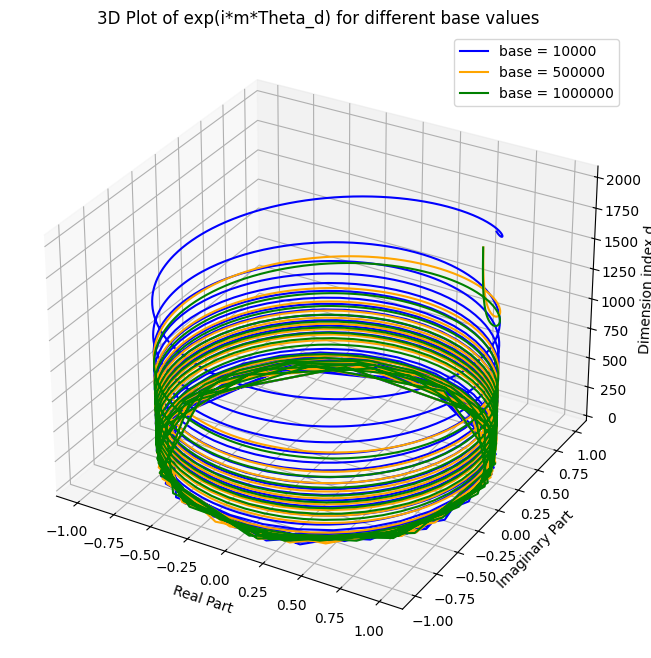

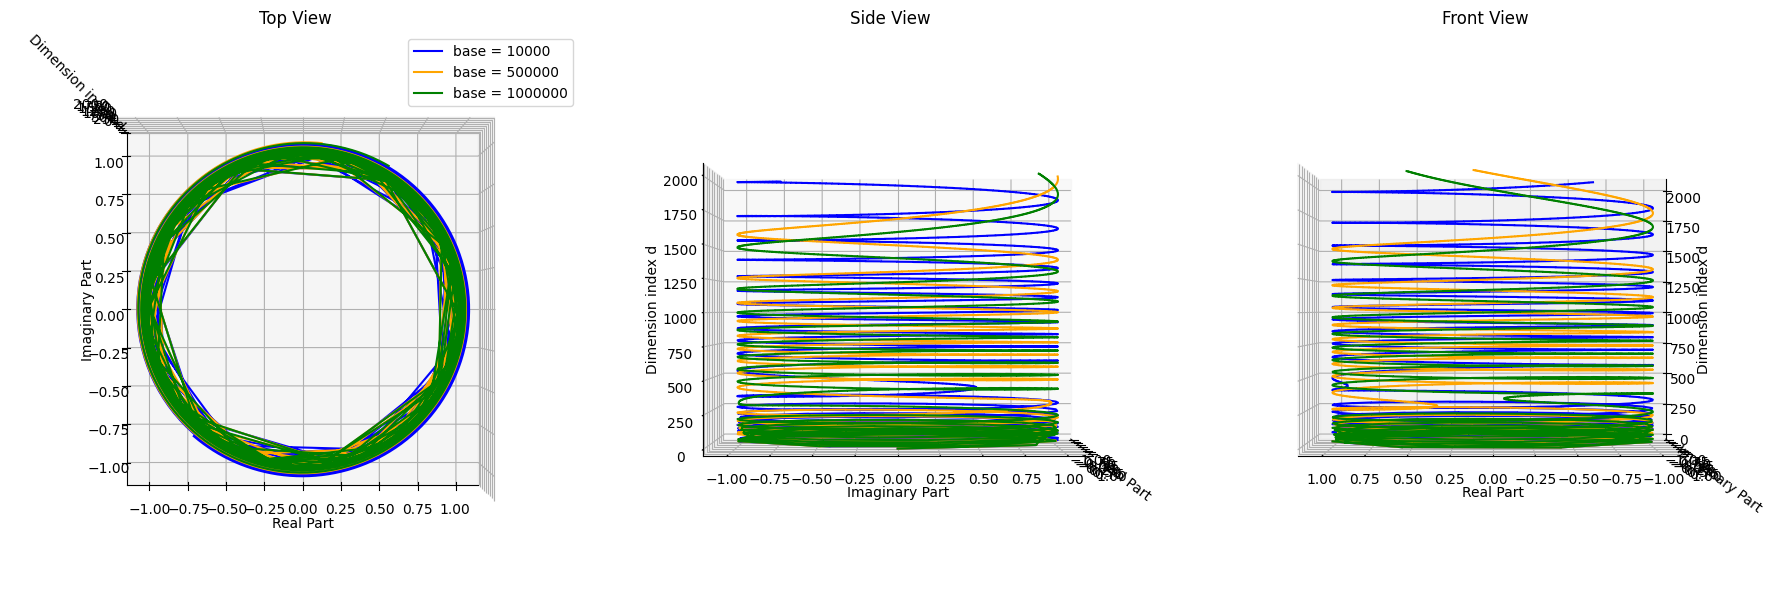

In [69]:
# Scale 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
D = 4096
Hidden_Size = 4096
Max_emb = 8192

# 根据需求调整m的定义范围
d = np.arange(1, 81920 + 1)  # 从1到D/2
m = np.arange(1, 81920 + 1)  # 同样长度的 m

# Scale adjustment for m
s = np.maximum(0, (m - Max_emb) / Max_emb)  # Compute scale only for m > Max_emb
print(s[32768:])
m_adjusted = m / (1 + s)  # Adjust m based on the scale
print(m_adjusted[:32768])
print(m_adjusted[32768:])


# Base values
bases = [10000, 500000, 1000000]
exp_i_x_list=[]
# 创建图形
plt.figure(figsize=(10, 6))

# 循环不同的base值，并计算theta_d及绘制m_theta_d
for base in bases:
    theta_d = base ** (-2 * (d // 2-1) / D)
    print(theta_d[:32768] )
    print(theta_d[32768:] )
    m_theta_d = m_adjusted // 2 * theta_d
    print(m_theta_d[:32768] )
    print(m_theta_d[32768:] )
    plt.plot(d[:2048], m_theta_d[:2048], label=f'base = {base}')
    
    exp_i_x = np.exp(1j * m_theta_d)  # 计算复数指数
    exp_i_x_list.append(exp_i_x)
    print(exp_i_x[:32768] )
    print(exp_i_x[32768:] )
    

plt.xlabel('Dimension index d')
plt.ylabel('m * Theta_d')
plt.title('Plot of m * Theta_d for different base values')
plt.legend()
plt.grid(True)
plt.show()

# 创建三维图形对象
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 循环处理不同的基底值，并计算和绘制exp(i*m*theta_d)
colors = ['b', 'orange', 'g']  # 不同颜色的曲线
for base, color in zip(bases, colors):
    theta_d = base ** (-2 * m / D)  # Correct formula for theta_d calculation
    m_theta_d = m_adjusted * theta_d
    exp_i_x = np.exp(1j * m_theta_d)  # Calculate the complex exponential

    # Plot the real part, imaginary part against the dimension index d
    
    ax.plot( np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048],d[:2048], label=f'base = {base}', color=color)
    
# Label the axes
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Dimension index d')
ax.set_title('3D Plot of exp(i*m*Theta_d) for different base values')

ax.legend()
plt.show()

# 创建三视图
fig = plt.figure(figsize=(18, 6))

# 绘制三视图
views = [(90, -90), (0, 0), (0, 90)]
titles = ['Top View', 'Side View', 'Front View']
colors = ['b', 'orange', 'g']  # 不同颜色的曲线

for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    for j, exp_i_x in enumerate(exp_i_x_list):
        ax.plot( np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048],d[:2048], label=f'base = {bases[j]}', color=colors[j])
    
    ax.view_init(*views[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.set_zlabel('Dimension index d')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()


[0.         0.         0.         ... 8.99975586 8.99987793 9.        ]
[1.00000000e+00 2.00000000e+00 3.00000000e+00 ... 9.10224691e+03
 9.10223457e+03 9.10222222e+03]
[1.00000000e+00 2.00000000e+00 3.00000000e+00 ... 9.10224691e+03
 9.10223457e+03 9.10222222e+03]
[ True  True  True ...  True  True  True]
[9.93276847e-01 9.86598896e-01 9.79965841e-01 ... 9.52939219e-23
 9.52947285e-23 9.52955349e-23]


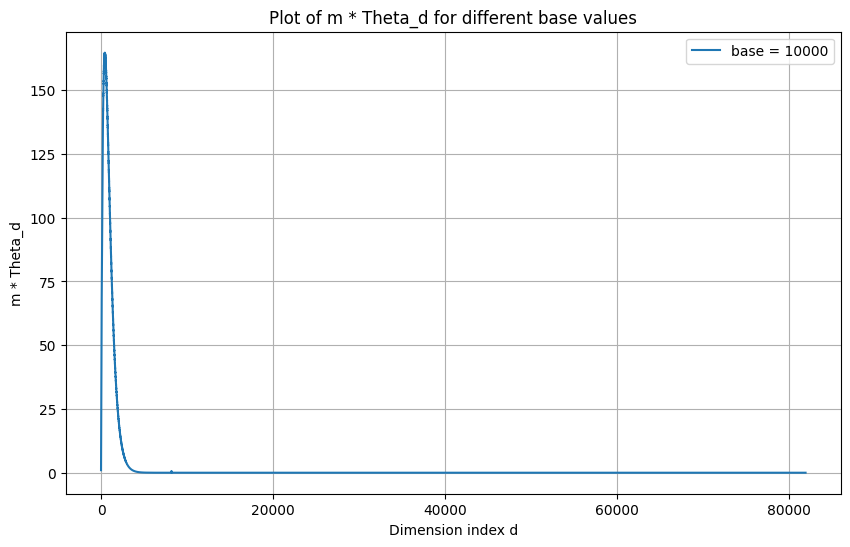

In [70]:
# scale NTK
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
Hidden_Size = 4096
Max_emb = 8192
D = Hidden_Size

# 根据需求调整m的定义范围
d = np.arange(1, 81920 + 1)
m = np.arange(1, 81920 + 1, dtype=float)  # Ensure m is a float to handle division correctly
m_adjusted = np.copy(m)
# Scale adjustment for m and conditional base adjustment
s = np.zeros_like(m, dtype=float)
mask = m > Max_emb
s[mask] = (m[mask] - Max_emb) / Max_emb
print(s)
m[mask] *= 1 / s[mask]
print(m)

# Prepare lists for plotting
exp_i_x_list = []
adjusted_bases = bases.copy()

m_adjusted[mask] *= 1 / s[mask]
print(m_adjusted)
print(m_adjusted==m)
# Base values
bases = np.array([10000, 500000, 1000000], dtype=float)
bases = np.array([10000])
# 计算theta_d及绘制m_theta_d
plt.figure(figsize=(10, 6))
for base in bases:
    scale_factor = np.power(s[mask], Hidden_Size / (Hidden_Size - 2))
    theta_d[mask] = (base * scale_factor) ** (-2 * m_adjusted[mask] / D)
    print(theta_d) # 这里会发生上溢
    theta_d = base ** (-2 * (d//2-1) / D)
    m_theta_d = m_adjusted * theta_d
    # plt.plot(d[32768:], m_theta_d[32768:], label=f'base = {base}')
    plt.plot(d, m_theta_d, label=f'base = {base}')
    # plt.plot(d[32768:40077], m_theta_d[32768:40077], label=f'base = {base}')
plt.xlabel('Dimension index d')
plt.ylabel('m * Theta_d')
plt.title('Plot of m * Theta_d for different base values')
plt.legend()
plt.grid(True)
plt.show()
# # Plot setup
# plt.figure(figsize=(10, 6))

# # Adjust bases conditionally and calculate exp(i*theta_d)
# for i, base in enumerate(bases):
#     # Adjust base if necessary
#     if np.any(mask):
#         adjusted_base = base * np.power(s[mask], Hidden_Size / (Hidden_Size - 2)).mean()  # Adjust base using the mean scale factor
        
#         adjusted_bases[i] = adjusted_base
        
#     else:
#         adjusted_base = base
    
#     theta_d = adjusted_base ** (-2 * m / D)
#     m_theta_d = m * theta_d
#     plt.plot(d, m_theta_d, label=f'base = {base}')
# plt.xlabel('Dimension index d')
# plt.ylabel('m * Theta_d')
# plt.title('Plot of m * Theta_d for different base values')
# plt.legend()
# plt.grid(True)
# plt.show()
# plt.figure(figsize=(10, 6))

# # Adjust bases conditionally and calculate exp(i*theta_d)
# for i, base in enumerate(bases):
#     # Adjust base if necessary
#     if np.any(mask):
#         adjusted_base = base * np.power(s[mask], Hidden_Size / (Hidden_Size - 2)).mean()  # Adjust base using the mean scale factor
#         adjusted_bases[i] = adjusted_base
        
#     else:
#         adjusted_base = base
#     print(adjusted_bases)
#     theta_d = adjusted_base ** (-2 * m / D)
#     m_theta_d = m * theta_d
     
#     exp_i_x = np.exp(1j * m_theta_d)  # Calculate the complex exponential
#     exp_i_x_list.append(exp_i_x)
#     plt.plot(d[:2048], np.real(exp_i_x)[:2048], label=f'base = {base} 超过max embed之后的adjusted base =  {adjusted_base:.2f}')

# plt.xlabel('Dimension index d')
# plt.ylabel('Real Part of exp(i*theta_d)')
# plt.title('Real Part of exp(i*theta_d) for adjusted base values')
# plt.legend()
# plt.grid(True)
# plt.show()

# # 3D Visualization of complex exponential values
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# colors = ['b', 'orange', 'g']
# for i, exp_i_x in enumerate(exp_i_x_list):
#     ax.plot(np.real(exp_i_x)[:2048], np.imag(exp_i_x)[:2048], d[:2048], label=f'base = {base} 超过max embed之后的adjusted base = {adjusted_bases[i]:.2f}', color=colors[i])

# ax.set_xlabel('Real Part')
# ax.set_ylabel('Imaginary Part')
# ax.set_zlabel('Dimension index d')
# ax.set_title('3D Plot of exp(i*m*Theta_d) for different adjusted base values')
# ax.legend()
# plt.show()


[ 4.49723651e-03 -0.00000000e+00 -0.00000000e+00 ... -2.72092668e+01
 -2.72093211e+01 -2.72093754e+01]


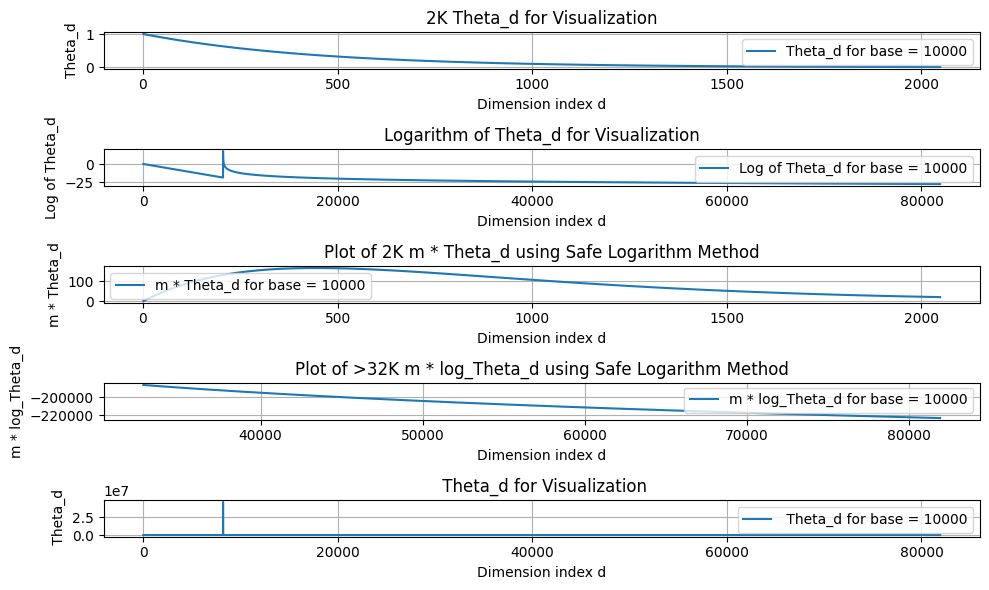

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
Hidden_Size = 4096
Max_emb = 8192
D = Hidden_Size

# Generate m and d
d = np.arange(1, 81920 + 1)
m = np.arange(1, 81920 + 1, dtype=float)

# Prepare scaling for m > Max_emb
s = np.zeros_like(m, dtype=float)
mask = m > Max_emb
s[mask] = (m[mask] - Max_emb) / Max_emb
m_adjusted = np.copy(m)
m_adjusted[mask] *= 1 / (1 + s[mask])

# Base values, just using one for simplicity
bases = np.array([10000])

# Start plotting setup
plt.figure(figsize=(10, 6))

# Calculate and plot
for base in bases:
    # Compute log(theta_d) to manage scale and prevent overflow
    log_theta_d = np.zeros_like(m)
    log_theta_d = -2 * (m_adjusted//2-1) / D * np.log(base)  # log(theta_d) computation directly

    if np.any(mask):
        scale_factor = np.power(s[mask], Hidden_Size / (Hidden_Size - 2))
        log_theta_d[mask] += np.log(scale_factor) * (-2 * m_adjusted[mask] / D)
        print(log_theta_d)
    # Convert log_theta_d to theta_d safely
    theta_d[mask] = np.exp(log_theta_d[mask])  # Safely convert back only if necessary, within limits
    m_theta_d = m_adjusted * theta_d
    m_log_theta_d = m_adjusted * log_theta_d
    # Plot log(theta_d) for better understanding of values
    plt.subplot(5, 1, 1)
    plt.plot(d[:2048], theta_d[:2048], label=f'Theta_d for base = {base}')
    plt.xlabel('Dimension index d')
    plt.ylabel('Theta_d')
    plt.title('2K Theta_d for Visualization')
    plt.legend()
    plt.grid(True)
    
    # Plot log(theta_d) for better understanding of values
    plt.subplot(5, 1, 2)
    plt.plot(d, log_theta_d, label=f'Log of Theta_d for base = {base}')
    plt.xlabel('Dimension index d')
    plt.ylabel('Log of Theta_d')
    plt.title('Logarithm of Theta_d for Visualization')
    plt.legend()
    plt.grid(True)

    # Plot m * theta_d using log transformation results
    plt.subplot(5, 1, 3)
    plt.plot(d[:2048], m_theta_d[:2048], label=f'm * Theta_d for base = {base}')
    plt.xlabel('Dimension index d')
    plt.ylabel('m * Theta_d')
    plt.title('Plot of 2K m * Theta_d using Safe Logarithm Method')
    plt.legend()
    plt.grid(True)
    
    # Plot m * theta_d using log transformation results
    plt.subplot(5, 1, 4)
    plt.plot(d[32768:], m_log_theta_d[32768:], label=f'm * log_Theta_d for base = {base}')
    plt.xlabel('Dimension index d')
    plt.ylabel('m * log_Theta_d')
    plt.title('Plot of >32K m * log_Theta_d using Safe Logarithm Method')
    plt.legend()
    plt.grid(True)
    # Plot log(theta_d) for better understanding of values
    plt.subplot(5, 1, 5)
    plt.plot(d, theta_d, label=f' Theta_d for base = {base}')
    plt.xlabel('Dimension index d')
    plt.ylabel(' Theta_d')
    plt.title(' Theta_d for Visualization')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_165500/4147329054.py:44: RuntimeWarning: overflow encountered in exp
  theta_d = np.exp(log_theta_d)
/tmp/ipykernel_165500/4147329054.py:45: RuntimeWarning: overflow encountered in multiply
  m_theta_d = m_adjusted * theta_d
/tmp/ipykernel_165500/4147329054.py:48: RuntimeWarning: invalid value encountered in multiply
  exp_i_m_theta = np.exp(1j * m_theta_d)
/tmp/ipykernel_165500/4147329054.py:48: RuntimeWarning: invalid value encountered in exp
  exp_i_m_theta = np.exp(1j * m_theta_d)


NameError: name 'idx' is not defined

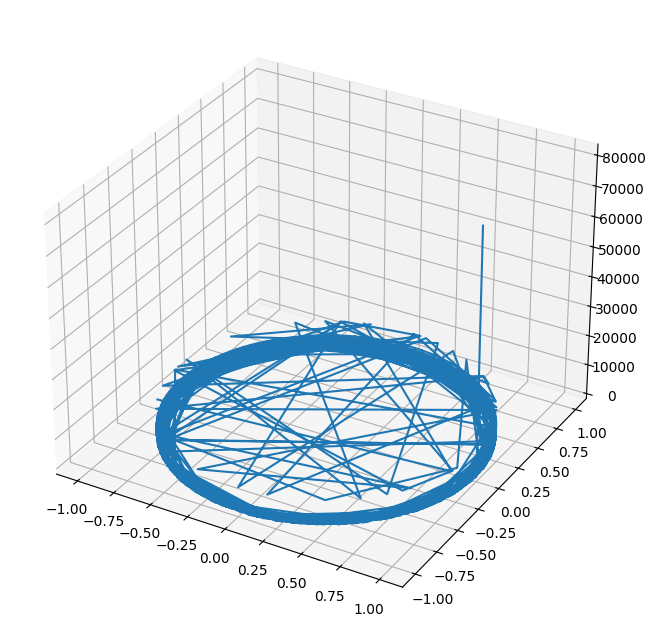

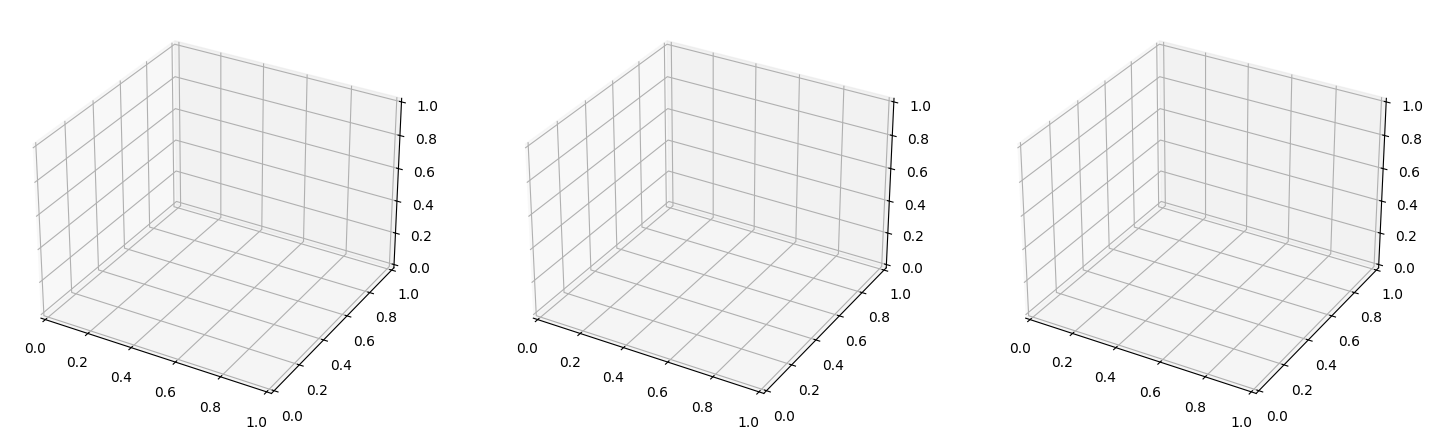

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
Hidden_Size = 4096
Max_emb = 8192
D = Hidden_Size

# Generate m and d
d = np.arange(1, 81920 + 1)
m = np.arange(1, 81920 + 1, dtype=float)

# Prepare scaling for m > Max_emb
s = np.zeros_like(m, dtype=float)
mask = m > Max_emb
s[mask] = (m[mask] - Max_emb) / Max_emb
m_adjusted = np.copy(m)
m_adjusted[mask] *= 1 /  s[mask]

# Base values, just using one for simplicity
bases = np.array([10000,500000,1000000])

# Prepare the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

fig1 = plt.figure(figsize=(18, 6))
ax1 = fig1.add_subplot(1, 3, 1, projection='3d')
ax2 = fig1.add_subplot(1, 3, 2, projection='3d')
ax3 = fig1.add_subplot(1, 3, 3, projection='3d')

colors = ['b', 'orange', 'g']   # Colors for different bases

# Calculate and plot
for base in bases:
    log_theta_d = -2 * (m_adjusted // 2 - 1) / D * np.log(base)  # Compute log(theta_d)

    if np.any(mask):
        scale_factor = np.power(s[mask], Hidden_Size / (Hidden_Size - 2))
        log_theta_d[mask] += np.log(scale_factor) * (-2 * m_adjusted[mask] / D)

    # Convert log_theta_d to theta_d safely
    theta_d = np.exp(log_theta_d)
    m_theta_d = m_adjusted * theta_d

    # Calculate the complex exponential e^(i*m*theta)
    exp_i_m_theta = np.exp(1j * m_theta_d)

    # Plot the real and imaginary parts along with the dimension index
    ax.plot(np.real(exp_i_m_theta), np.imag(exp_i_m_theta), d, label=f'Base = {base}')
    
    # Top View
    ax1.plot(np.real(exp_i_m_theta), np.imag(exp_i_m_theta), d, color=colors[idx])
    ax1.view_init(elev=90, azim=-90)
    ax1.set_title('Top View')
    ax1.set_xlabel('Real Part')
    ax1.set_ylabel('Imaginary Part')
    ax1.set_zlabel('Dimension index d')

    # Side View
    ax2.plot(np.real(exp_i_m_theta), np.imag(exp_i_m_theta), d, color=colors[idx])
    ax2.view_init(elev=0, azim=0)
    ax2.set_title('Side View')
    ax2.set_xlabel('Real Part')
    ax2.set_ylabel('Imaginary Part')
    ax2.set_zlabel('Dimension index d')

    # Front View
    ax3.plot(np.real(exp_i_m_theta), np.imag(exp_i_m_theta), d, color=colors[idx])
    ax3.view_init(elev=0, azim=90)
    ax3.set_title('Front View')
    ax3.set_xlabel('Real Part')
    ax3.set_ylabel('Imaginary Part')
    ax3.set_zlabel('Dimension index d')

# Set labels and title
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Dimension index d')
ax.set_title('3D Plot of exp(i*m*Theta_d)')

# Show the plot
plt.legend()
plt.show()



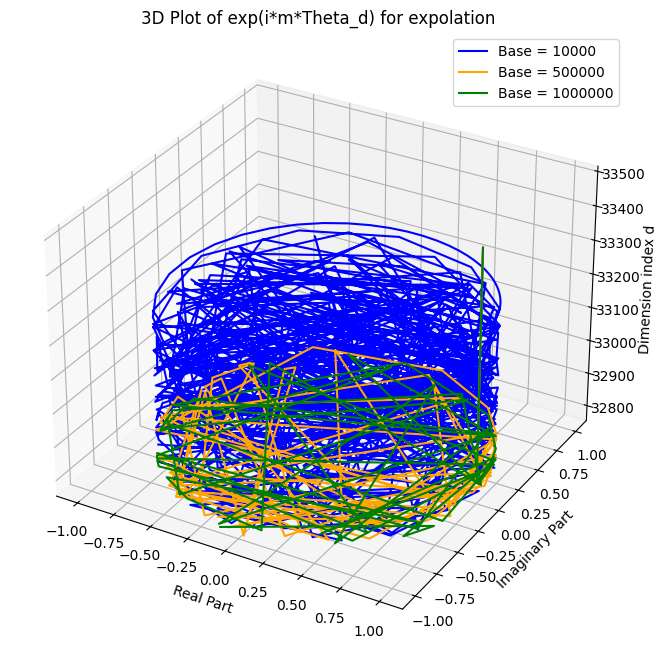

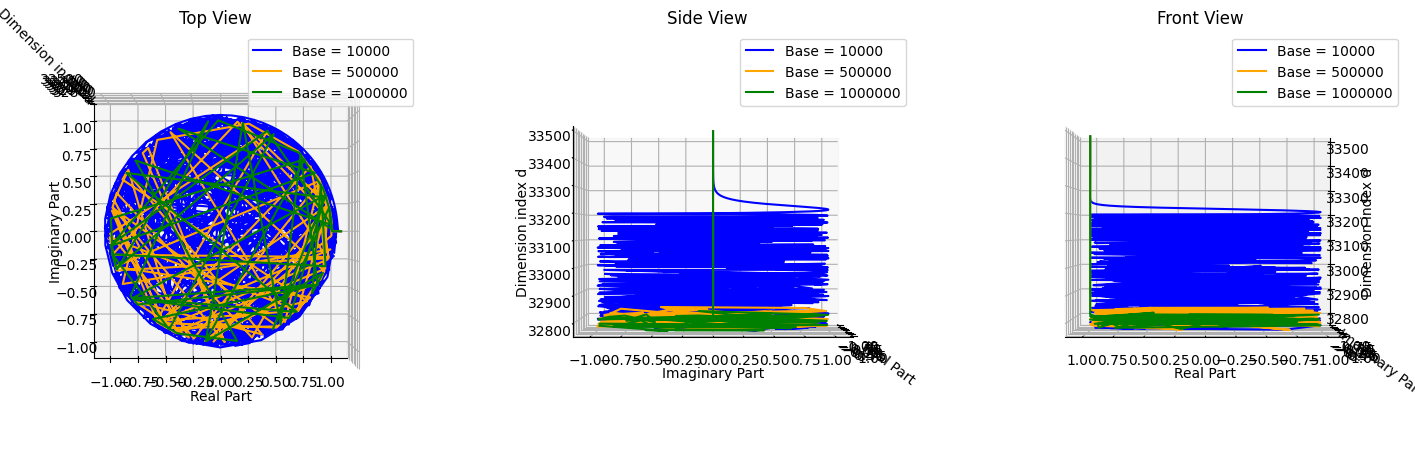

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
Hidden_Size = 4096
Max_emb = 8192
D = Hidden_Size

# Generate m and d
d = np.arange(1, 81920 + 1)
m = np.arange(1, 81920 + 1, dtype=float)

# Prepare scaling for m > Max_emb
s = np.zeros_like(m, dtype=float)
mask = m > Max_emb
s[mask] = (m[mask] - Max_emb) / Max_emb
m_adjusted = np.copy(m)
m_adjusted[mask] *= 1 / ( 1+s[mask]) # 这里应该是倒数来的,加了个1

# Base values
bases = np.array([10000, 500000,1000000])

# Prepare the figures
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

fig1 = plt.figure(figsize=(18, 6))
ax1 = fig1.add_subplot(1, 3, 1, projection='3d')
ax2 = fig1.add_subplot(1, 3, 2, projection='3d')
ax3 = fig1.add_subplot(1, 3, 3, projection='3d')

colors = ['b', 'orange', 'g']   # Colors for different bases

# Calculate and plot
for idx, base in enumerate(bases):
    theta_d  = -2 * (m_adjusted // 2 - 1) / D * base
    log_theta_d = -2 * (m_adjusted // 2 - 1) / D * np.log(base)  # Compute log(theta_d)

    if np.any(mask):
        scale_factor = np.power(s[mask], Hidden_Size / (Hidden_Size - 2))
        log_theta_d[mask] += np.log(scale_factor) * (-2 * m_adjusted[mask] / D)

    theta_d = np.exp(log_theta_d)
    m_theta_d = m_adjusted * theta_d

    # Calculate the complex exponential e^(i*m*theta)
    exp_i_m_theta = np.exp(1j * m_theta_d)

    # Plot in the main 3D plot
    ax.plot(np.real(exp_i_m_theta)[32768:33500], np.imag(exp_i_m_theta)[32768:33500], d[32768:33500], label=f'Base = {base}', color=colors[idx])

    # Top View
    ax1.plot(np.real(exp_i_m_theta)[32768:33500], np.imag(exp_i_m_theta)[32768:33500], d[32768:33500], color=colors[idx])
    ax1.view_init(elev=90, azim=-90)
    ax1.set_title('Top View')
    ax1.set_xlabel('Real Part')
    ax1.set_ylabel('Imaginary Part')
    ax1.set_zlabel('Dimension index d')

    # Side View
    ax2.plot(np.real(exp_i_m_theta)[32768:33500], np.imag(exp_i_m_theta)[32768:33500], d[32768:33500], color=colors[idx])
    ax2.view_init(elev=0, azim=0)
    ax2.set_title('Side View')
    ax2.set_xlabel('Real Part')
    ax2.set_ylabel('Imaginary Part')
    ax2.set_zlabel('Dimension index d')

    # Front View
    ax3.plot(np.real(exp_i_m_theta)[32768:33500], np.imag(exp_i_m_theta)[32768:33500], d[32768:33500], color=colors[idx])
    ax3.view_init(elev=0, azim=90)
    ax3.set_title('Front View')
    ax3.set_xlabel('Real Part')
    ax3.set_ylabel('Imaginary Part')
    ax3.set_zlabel('Dimension index d')

# Set labels and title for the main plot
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Dimension index d')
ax.set_title('3D Plot of exp(i*m*Theta_d) for expolation')
ax.legend()

# Show legends for three views
ax1.legend([f'Base = {base}' for base in bases])
ax2.legend([f'Base = {base}' for base in bases])
ax3.legend([f'Base = {base}' for base in bases])

plt.show()


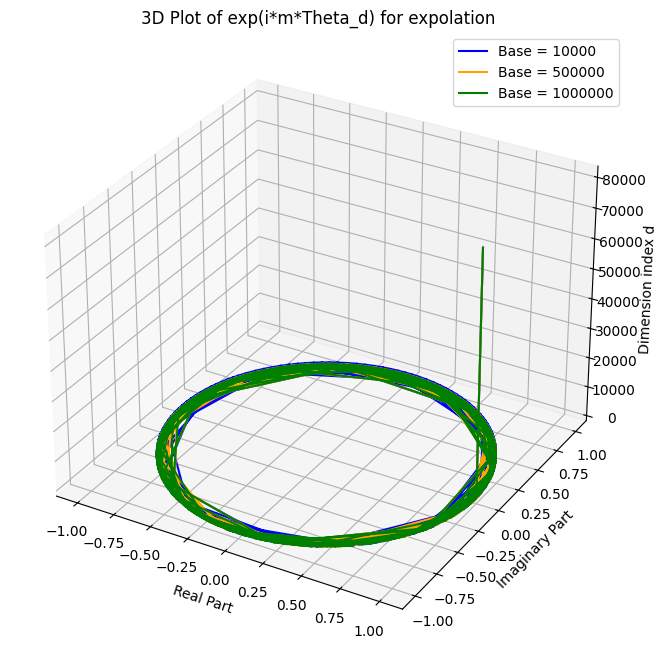

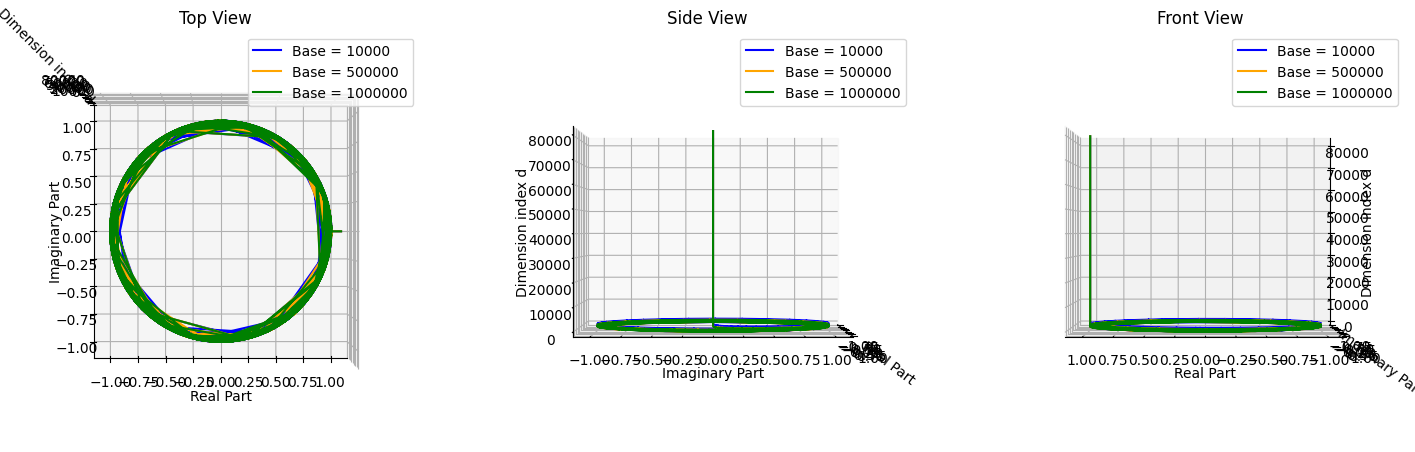

In [ ]:
# Scaled Dynamic NTK?
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
Hidden_Size = 4096
Max_emb = 8192
D = Hidden_Size

# Generate m and d
d = np.arange(1, 81920 + 1)
m = np.arange(1, 81920 + 1, dtype=float)

# Prepare scaling for m > Max_emb
s = np.zeros_like(m, dtype=float)
mask = m > Max_emb
s[mask] = np.maximum(1,(m[mask] - Max_emb) / Max_emb) # 更新比例因子,优雅降级
m_adjusted = np.copy(m)
m_adjusted[mask] *= 1 / (s[mask])

# Base values
bases = np.array([10000, 500000,1000000])

# Prepare the figures
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

fig1 = plt.figure(figsize=(18, 6))
ax1 = fig1.add_subplot(1, 3, 1, projection='3d')
ax2 = fig1.add_subplot(1, 3, 2, projection='3d')
ax3 = fig1.add_subplot(1, 3, 3, projection='3d')

colors = ['b', 'orange', 'g']   # Colors for different bases

# Calculate and plot
for idx, base in enumerate(bases):
    theta_d  = -2 * (m_adjusted // 2 - 1) / D * base
    log_theta_d = -2 * (m_adjusted // 2 - 1) / D * np.log(base)  # Compute log(theta_d)

    if np.any(mask):
        scale_factor = np.power(s[mask], Hidden_Size / (Hidden_Size - 2))
        log_theta_d[mask] += np.log(scale_factor) * (-2 * m_adjusted[mask] / D)

    theta_d = np.exp(log_theta_d)
    m_theta_d = m_adjusted * theta_d

    # Calculate the complex exponential e^(i*m*theta)
    exp_i_m_theta = np.exp(1j * m_theta_d)

    # Plot in the main 3D plot
    ax.plot(np.real(exp_i_m_theta), np.imag(exp_i_m_theta), d, label=f'Base = {base}', color=colors[idx])

    # Top View
    ax1.plot(np.real(exp_i_m_theta), np.imag(exp_i_m_theta), d, color=colors[idx])
    ax1.view_init(elev=90, azim=-90)
    ax1.set_title('Top View')
    ax1.set_xlabel('Real Part')
    ax1.set_ylabel('Imaginary Part')
    ax1.set_zlabel('Dimension index d')

    # Side View
    ax2.plot(np.real(exp_i_m_theta), np.imag(exp_i_m_theta), d, color=colors[idx])
    ax2.view_init(elev=0, azim=0)
    ax2.set_title('Side View')
    ax2.set_xlabel('Real Part')
    ax2.set_ylabel('Imaginary Part')
    ax2.set_zlabel('Dimension index d')

    # Front View
    ax3.plot(np.real(exp_i_m_theta), np.imag(exp_i_m_theta), d, color=colors[idx])
    ax3.view_init(elev=0, azim=90)
    ax3.set_title('Front View')
    ax3.set_xlabel('Real Part')
    ax3.set_ylabel('Imaginary Part')
    ax3.set_zlabel('Dimension index d')

# Set labels and title for the main plot
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Dimension index d')
ax.set_title('3D Plot of exp(i*m*Theta_d) for expolation')
ax.legend()

# Show legends for three views
ax1.legend([f'Base = {base}' for base in bases])
ax2.legend([f'Base = {base}' for base in bases])
ax3.legend([f'Base = {base}' for base in bases])

plt.show()
